# PROJECT OVERVIEW

James M. Irving, Ph.D.

Flatiron Full Time Data Science 021119 Cohort

https://mybinder.org/v2/gh/jirvingphd/bs_ds/master

In [1]:
# !pip install -U cufflinks
# !pip install -U fsds

# %conda config --add channels conda-forge
# %conda install qgrid

from fsds.imports import *

fsds v0.2.22 loaded.  Read the docs: https://fs-ds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


[i] Pandas .iplot() method activated.


In [2]:

## IMPORT CONVENIENCE/DISPLAY FUNCTIONS
from pprint import pprint
import qgrid
import json
import ipywidgets as widgets

# Import plotly and cufflinks for iplots
import plotly
import cufflinks as cf
from plotly import graph_objs as go
from plotly.offline import iplot
cf.go_offline()

In [3]:
import os,sys
sys.path.append('py_files/')

## IMPORT MY PUBLISHED PYPI PACKAGE 
# import bs_ds as  bs
import bs_ds_local as bs
# from fsds_100719.imports import *
# from bs_ds.imports import *

In [4]:
## IMPORT CUSTOM CAPSTONE FUNCTIONS
import functions_combined_BEST as ji
import functions_io as io

from functions_combined_BEST import ihelp, ihelp_menu,\
reload, inspect_variables


In [5]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

#Set pd.set_options for tweet visibility
pd.set_option('display.max_colwidth',100)
pd.set_option('display.max_columns',50)

In [6]:
## Saving the sys.stdout to restore later
import sys
__stdout__=sys.stdout

file_dict = io.def_filename_dictionary(load_prior=False, save_directory=True)

------------ Dictionary Contents ------------


interactive(children=(Dropdown(description='dict_to_display', options={'file_directory': {'history': '', 'file…

[i] filename_directory saved to data/filename_dictionary.json.
	 - use `update_file_directory(file_dict)` to update file.
[i] creating all required folders...


# OBTAIN

### DATA SOURCES:

* **All Donald Trump tweets from 12/01/2016 (pre-inaugaration day) to end of 08/23/2018**
    *          Extracted from http://www.trumptwitterarchive.com/

* **Minute-resolution data for the S&P500 covering the same time period.**
    *         IVE S&P500 Index from - http://www.kibot.com/free_historical_data.aspx
    - (***Aggregate 1 min bid-ask data link***)
        - http://api.kibot.com/?action=history&symbol=IVE&interval=tickbidask1&bp=1&user=guest
    
    
* NOTE: Both sources required manual extraction and both 1-min historical stock data and batch-historical-tweet data are difficult to obtain without paying \\$150-\\$2000 monthly developer memberships. 

In [7]:
# ## Attempt to Get Stock Data With Code

import requests
import pandas as pd

def download_stock_data(fpath='data/ive_minute_tick_bidask_API.csv',
                       verbose=True):
    """Downloads up-to-date IVE S&P 500 1-min aggregate data from 
    http://www.kibot.com/free_historical_data.aspx
    
    Args:
        fpath (str): csv filepath to save (Default='data/ive_minute_tick_bidask_API.csv')
        verbose (bool): Display file info (Default=True)
        
    Returns:
        stock_df: DataFrame with correct headers and datetime index"""
    agg_url = 'http://api.kibot.com/?action=history&symbol=IVE&interval=tickbidask1&bp=1&user=guest'
    response = requests.get(agg_url,
                            allow_redirects=True)

    ## Save output to csv file
    with open(fpath,'wb') as file:
        file.write(response.content)
        
        
    ## Load in Stock Data Frame with headers (then save)
    headers = ['Date','Time','BidOpen','BidHigh','BidLow','BidClose','AskOpen','AskHigh','AskLow','AskClose']
    stock_df = pd.read_csv(fpath,names=headers)

# 
    ## Make Combined Date Time column and Drop Origs
    stock_df['datetime'] = pd.to_datetime(stock_df['Date'].astype(str)+' '+stock_df['Time'].astype(str))
    stock_df.to_csv(fpath,index=False)
        
    if verbose:
        print('[i] Data successfully downloaded and saved as:')
        print(' - ',fpath)
        
    return pd.read_csv(fpath,parse_dates=['datetime'],index_col='datetime')

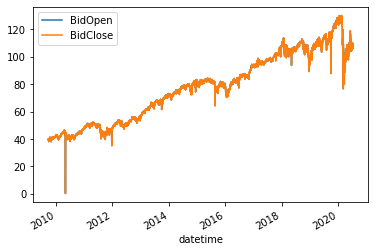

In [8]:
# stock_df = download_stock_data_csv()
stock_df = pd.read_csv('data/ive_minute_tick_bidask_API.csv',
                       parse_dates=['datetime'],
                       index_col='datetime')

## Remove Other Columns
stock_df = stock_df[['BidOpen','BidClose']]


## Remove rare 0-values
stock_df = stock_df[(stock_df>0).all(axis=1)]


stock_df.plot()

In [9]:
stock_df.head()

,BidOpen,BidClose
datetime,,
2009-09-28 09:30:00,39.35,39.35
2009-09-28 09:31:00,39.38,39.38
2009-09-28 09:32:00,39.39,39.43
2009-09-28 09:33:00,39.42,39.42
2009-09-28 09:34:00,39.42,39.41


In [10]:
stock_df.index

DatetimeIndex(['2009-09-28 09:30:00', '2009-09-28 09:31:00',
               '2009-09-28 09:32:00', '2009-09-28 09:33:00',
               '2009-09-28 09:34:00', '2009-09-28 09:36:00',
               '2009-09-28 09:37:00', '2009-09-28 09:38:00',
               '2009-09-28 09:40:00', '2009-09-28 09:41:00',
               ...
               '2020-07-10 15:50:00', '2020-07-10 15:51:00',
               '2020-07-10 15:52:00', '2020-07-10 15:53:00',
               '2020-07-10 15:54:00', '2020-07-10 15:55:00',
               '2020-07-10 15:56:00', '2020-07-10 15:58:00',
               '2020-07-10 15:59:00', '2020-07-10 16:00:00'],
              dtype='datetime64[ns]', name='datetime', length=888284, freq=None)

In [11]:
# ## Load in Stock Data Frame with headers (then save)
# headers = ['Date','Time','BidOpen','BidHigh','BidLow','BidClose','AskOpen','AskHigh','AskLow','AskClose']
# stock_df = pd.read_csv('data/ive_minute_tick_bidask_API.csv',names=headers)

# ## Convert Date and Time for Making Date-Time
# convert_cols = ['Date','Time']
# for col in convert_cols:
#     stock_df[col] = stock_df[col].astype(str)

# ## Make Combined Date Time column and Drop Origs
# stock_df['datetime'] = pd.to_datetime(stock_df['Date']+' '+stock_df['Time'])
# stock_df

In [12]:
# # fullfilename = '/Users/jamesirving/Downloads/IVE_tickbidask (4).txt'
# fullfilename = '/Users/jamesirving/Downloads/IVE_bidask1min (2).txt'
# headers = ['Date','Time','BidOpen','BidHigh','BidLow','BidClose','AskOpen','AskHigh','AskLow','AskClose']
# stock_df = pd.read_csv(fullfilename, names=headers,parse_dates=True)
# stock_df

# SCRUB


### Tweet Processing

In [13]:
# reload(ji)
# func_list = [ji.load_raw_twitter_file,
#            ji.make_stopwords_list,
#            ji.full_twitter_df_processing,
#            ji.full_sentiment_analysis]
# ji.ihelp_menu(func_list)
# # ji.save_ihelp_menu_to_file(func_list,filename='_twitter_processing')

In [14]:
import os
# os.listdir('data')

In [15]:
# from functions_combined_BEST import ihelp_menu2
# raw_tweets = 'data/trump_tweets_12012016_to_01012020.csv'
raw_tweets = 'data/trump_twitter_archive_07112020.csv'

## Load in raw csv of twitter_data, create date_time_index, rename columns
# raw_tweets ='data/trump_tweets_12012016_to_01012020.csv'
twitter_df = ji.load_raw_twitter_file(filename=raw_tweets, 
                         date_as_index=True,
                         rename_map={'text': 'content',
                                     'created_at': 'date'})
twitter_df.head()

[io] Loading raw tweet text file: data/trump_twitter_archive_07112020.csv


,source,content,date,retweet_count,favorite_count,is_retweet,id_str
date,,,,,,,
2020-07-11 18:44:28,Twitter for iPhone,RT @GreggJarrett: Pelosi Shrugs Off Mobs ‘People Will Do What They Do’ Tells Young People Everyt...,2020-07-11 18:44:28,4728,0,True,1282022963987054592
2020-07-11 18:43:57,Twitter for iPhone,RT @GreggJarrett: Trump right to commute Roger Stone’s sentence – Stone committed no crime was f...,2020-07-11 18:43:57,8574,0,True,1282022835867791361
2020-07-11 18:43:47,Twitter for iPhone,RT @GreggJarrett: Biased anti-Flynn rogue judge exceeds authority by refusing to dismiss wrongfu...,2020-07-11 18:43:47,6188,0,True,1282022791857025025
2020-07-11 18:42:55,Twitter for iPhone,RT @TVNewsHQ: Fox News’ @GreggJarrett on President Trump’s commutation of Roger Stone sentence: ...,2020-07-11 18:42:55,3612,0,True,1282022576441700356
2020-07-11 13:16:00,Twitter for iPhone,RT @realDonaldTrump: President Trump Approval Rating in the Republican Party at 96%. Thank You!,2020-07-11 13:16:00,39286,0,True,1281940302782136320


# 07/11/20 - Changing ORder

1. Import stock data FIRST and get delta-tweet price change
2. Use Sklearn RandomForest with TweetTokenizer

In [16]:
twitter_df.head()

,source,content,date,retweet_count,favorite_count,is_retweet,id_str
date,,,,,,,
2020-07-11 18:44:28,Twitter for iPhone,RT @GreggJarrett: Pelosi Shrugs Off Mobs ‘People Will Do What They Do’ Tells Young People Everyt...,2020-07-11 18:44:28,4728,0,True,1282022963987054592
2020-07-11 18:43:57,Twitter for iPhone,RT @GreggJarrett: Trump right to commute Roger Stone’s sentence – Stone committed no crime was f...,2020-07-11 18:43:57,8574,0,True,1282022835867791361
2020-07-11 18:43:47,Twitter for iPhone,RT @GreggJarrett: Biased anti-Flynn rogue judge exceeds authority by refusing to dismiss wrongfu...,2020-07-11 18:43:47,6188,0,True,1282022791857025025
2020-07-11 18:42:55,Twitter for iPhone,RT @TVNewsHQ: Fox News’ @GreggJarrett on President Trump’s commutation of Roger Stone sentence: ...,2020-07-11 18:42:55,3612,0,True,1282022576441700356
2020-07-11 13:16:00,Twitter for iPhone,RT @realDonaldTrump: President Trump Approval Rating in the Republican Party at 96%. Thank You!,2020-07-11 13:16:00,39286,0,True,1281940302782136320


# 📕 BOOKMARK 07/11

In [17]:
## Make 1-min freq stock time series
stock_ts = stock_df.asfreq('T')
stock_ts.index

DatetimeIndex(['2009-09-28 09:30:00', '2009-09-28 09:31:00',
               '2009-09-28 09:32:00', '2009-09-28 09:33:00',
               '2009-09-28 09:34:00', '2009-09-28 09:35:00',
               '2009-09-28 09:36:00', '2009-09-28 09:37:00',
               '2009-09-28 09:38:00', '2009-09-28 09:39:00',
               ...
               '2020-07-10 15:51:00', '2020-07-10 15:52:00',
               '2020-07-10 15:53:00', '2020-07-10 15:54:00',
               '2020-07-10 15:55:00', '2020-07-10 15:56:00',
               '2020-07-10 15:57:00', '2020-07-10 15:58:00',
               '2020-07-10 15:59:00', '2020-07-10 16:00:00'],
              dtype='datetime64[ns]', name='datetime', length=5671111, freq='T')

## AH HA! MISMATCHED TIMESTAMPS

- I LOVE @GoyaFoods! tweet https://twitter.com/realDonaldTrump/status/1281731565278515202?s=20
    - Marked as 07:26 pm on 07/10/20 on TWITTER
    - Archive time is 23:26:33 (11:26 pm).
    - THERE FORE TWEETS ARE MISLABELED AS 4 HOURS LATER IN THE DAY

In [18]:
test_tweet = twitter_df.loc['07/10/20'].iloc[0]#['date']
print(test_tweet)
test_ts = test_tweet['date'] + pd.Timedelta(hours=-4)
test_ts

source             Twitter for iPhone
content            I LOVE @GoyaFoods!
date              2020-07-10 23:26:33
retweet_count                   55657
favorite_count                 277885
is_retweet                      False
id_str            1281731565278515202
Name: 2020-07-10 23:26:33, dtype: object


Timestamp('2020-07-10 19:26:33')

In [19]:
# twitter_df.reset_index(drop=True,inplace=True)
# twitter_df

In [20]:
## Fixing and Saving Update Times
twitter_df['date-fixed'] = twitter_df['date'] + pd.Timedelta(hours=-4)
twitter_df.set_index('date-fixed',inplace=True,drop=False)
twitter_df

,source,content,date,retweet_count,favorite_count,is_retweet,id_str,date-fixed
date-fixed,,,,,,,,
2020-07-11 14:44:28,Twitter for iPhone,RT @GreggJarrett: Pelosi Shrugs Off Mobs ‘People Will Do What They Do’ Tells Young People Everyt...,2020-07-11 18:44:28,4728,0,True,1282022963987054592,2020-07-11 14:44:28
2020-07-11 14:43:57,Twitter for iPhone,RT @GreggJarrett: Trump right to commute Roger Stone’s sentence – Stone committed no crime was f...,2020-07-11 18:43:57,8574,0,True,1282022835867791361,2020-07-11 14:43:57
2020-07-11 14:43:47,Twitter for iPhone,RT @GreggJarrett: Biased anti-Flynn rogue judge exceeds authority by refusing to dismiss wrongfu...,2020-07-11 18:43:47,6188,0,True,1282022791857025025,2020-07-11 14:43:47
2020-07-11 14:42:55,Twitter for iPhone,RT @TVNewsHQ: Fox News’ @GreggJarrett on President Trump’s commutation of Roger Stone sentence: ...,2020-07-11 18:42:55,3612,0,True,1282022576441700356,2020-07-11 14:42:55
2020-07-11 09:16:00,Twitter for iPhone,RT @realDonaldTrump: President Trump Approval Rating in the Republican Party at 96%. Thank You!,2020-07-11 13:16:00,39286,0,True,1281940302782136320,2020-07-11 09:16:00
...,...,...,...,...,...,...,...,...
2016-01-01 19:00:09,Twitter for Android,Well the year has officially begun. I have many stops planned and will be working very hard to w...,2016-01-01 23:00:09,2642,8495,False,683060169677344768,2016-01-01 19:00:09
2016-01-01 17:29:56,Twitter for Android,@sprinklermanus: @CNN @realDonaldTrump they're spending millions but you're still going to win -...,2016-01-01 21:29:56,933,3330,False,683037464504745985,2016-01-01 17:29:56
2016-01-01 02:08:06,Twitter for Android,"@jallenaip: Hillary said she was in a Fog of War"" as explanation for the lies about Benghazi. No...",2016-01-01 06:08:06,2721,7490,False,682805477168779264,2016-01-01 02:08:06


In [21]:
## Getting the Tweet Minute by rounding up to end of the minute
twitter_df['tweet_minute'] = twitter_df.index.ceil('T')
twitter_df

,source,content,date,retweet_count,favorite_count,is_retweet,id_str,date-fixed,tweet_minute
date-fixed,,,,,,,,,
2020-07-11 14:44:28,Twitter for iPhone,RT @GreggJarrett: Pelosi Shrugs Off Mobs ‘People Will Do What They Do’ Tells Young People Everyt...,2020-07-11 18:44:28,4728,0,True,1282022963987054592,2020-07-11 14:44:28,2020-07-11 14:45:00
2020-07-11 14:43:57,Twitter for iPhone,RT @GreggJarrett: Trump right to commute Roger Stone’s sentence – Stone committed no crime was f...,2020-07-11 18:43:57,8574,0,True,1282022835867791361,2020-07-11 14:43:57,2020-07-11 14:44:00
2020-07-11 14:43:47,Twitter for iPhone,RT @GreggJarrett: Biased anti-Flynn rogue judge exceeds authority by refusing to dismiss wrongfu...,2020-07-11 18:43:47,6188,0,True,1282022791857025025,2020-07-11 14:43:47,2020-07-11 14:44:00
2020-07-11 14:42:55,Twitter for iPhone,RT @TVNewsHQ: Fox News’ @GreggJarrett on President Trump’s commutation of Roger Stone sentence: ...,2020-07-11 18:42:55,3612,0,True,1282022576441700356,2020-07-11 14:42:55,2020-07-11 14:43:00
2020-07-11 09:16:00,Twitter for iPhone,RT @realDonaldTrump: President Trump Approval Rating in the Republican Party at 96%. Thank You!,2020-07-11 13:16:00,39286,0,True,1281940302782136320,2020-07-11 09:16:00,2020-07-11 09:16:00
...,...,...,...,...,...,...,...,...,...
2016-01-01 19:00:09,Twitter for Android,Well the year has officially begun. I have many stops planned and will be working very hard to w...,2016-01-01 23:00:09,2642,8495,False,683060169677344768,2016-01-01 19:00:09,2016-01-01 19:01:00
2016-01-01 17:29:56,Twitter for Android,@sprinklermanus: @CNN @realDonaldTrump they're spending millions but you're still going to win -...,2016-01-01 21:29:56,933,3330,False,683037464504745985,2016-01-01 17:29:56,2016-01-01 17:30:00
2016-01-01 02:08:06,Twitter for Android,"@jallenaip: Hillary said she was in a Fog of War"" as explanation for the lies about Benghazi. No...",2016-01-01 06:08:06,2721,7490,False,682805477168779264,2016-01-01 02:08:06,2016-01-01 02:09:00


## Making new MultiIndex to fetch tweets 

In [22]:
## Get a Rounded version of the tweet time stamps
tweet_ts = twitter_df.index.ceil('T')
tweet_ts

DatetimeIndex(['2020-07-11 14:45:00', '2020-07-11 14:44:00',
               '2020-07-11 14:44:00', '2020-07-11 14:43:00',
               '2020-07-11 09:16:00', '2020-07-11 09:16:00',
               '2020-07-11 09:16:00', '2020-07-11 09:15:00',
               '2020-07-11 09:15:00', '2020-07-11 09:13:00',
               ...
               '2016-01-01 19:25:00', '2016-01-01 19:11:00',
               '2016-01-01 19:09:00', '2016-01-01 19:07:00',
               '2016-01-01 19:03:00', '2016-01-01 19:01:00',
               '2016-01-01 17:30:00', '2016-01-01 02:09:00',
               '2016-01-01 02:08:00', '2016-01-01 01:19:00'],
              dtype='datetime64[ns]', name='date-fixed', length=24020, freq=None)

In [23]:
## Save Time Betweetn Tweets
twitter_df['tweet_freq'] = twitter_df['date-fixed'].diff(-1)
twitter_df

,source,content,date,retweet_count,favorite_count,is_retweet,id_str,date-fixed,tweet_minute,tweet_freq
date-fixed,,,,,,,,,,
2020-07-11 14:44:28,Twitter for iPhone,RT @GreggJarrett: Pelosi Shrugs Off Mobs ‘People Will Do What They Do’ Tells Young People Everyt...,2020-07-11 18:44:28,4728,0,True,1282022963987054592,2020-07-11 14:44:28,2020-07-11 14:45:00,00:00:31
2020-07-11 14:43:57,Twitter for iPhone,RT @GreggJarrett: Trump right to commute Roger Stone’s sentence – Stone committed no crime was f...,2020-07-11 18:43:57,8574,0,True,1282022835867791361,2020-07-11 14:43:57,2020-07-11 14:44:00,00:00:10
2020-07-11 14:43:47,Twitter for iPhone,RT @GreggJarrett: Biased anti-Flynn rogue judge exceeds authority by refusing to dismiss wrongfu...,2020-07-11 18:43:47,6188,0,True,1282022791857025025,2020-07-11 14:43:47,2020-07-11 14:44:00,00:00:52
2020-07-11 14:42:55,Twitter for iPhone,RT @TVNewsHQ: Fox News’ @GreggJarrett on President Trump’s commutation of Roger Stone sentence: ...,2020-07-11 18:42:55,3612,0,True,1282022576441700356,2020-07-11 14:42:55,2020-07-11 14:43:00,05:26:55
2020-07-11 09:16:00,Twitter for iPhone,RT @realDonaldTrump: President Trump Approval Rating in the Republican Party at 96%. Thank You!,2020-07-11 13:16:00,39286,0,True,1281940302782136320,2020-07-11 09:16:00,2020-07-11 09:16:00,00:00:42
...,...,...,...,...,...,...,...,...,...,...
2016-01-01 19:00:09,Twitter for Android,Well the year has officially begun. I have many stops planned and will be working very hard to w...,2016-01-01 23:00:09,2642,8495,False,683060169677344768,2016-01-01 19:00:09,2016-01-01 19:01:00,01:30:13
2016-01-01 17:29:56,Twitter for Android,@sprinklermanus: @CNN @realDonaldTrump they're spending millions but you're still going to win -...,2016-01-01 21:29:56,933,3330,False,683037464504745985,2016-01-01 17:29:56,2016-01-01 17:30:00,15:21:50
2016-01-01 02:08:06,Twitter for Android,"@jallenaip: Hillary said she was in a Fog of War"" as explanation for the lies about Benghazi. No...",2016-01-01 06:08:06,2721,7490,False,682805477168779264,2016-01-01 02:08:06,2016-01-01 02:09:00,00:00:38


In [24]:
## Set MultiIndex to Easily View Rapid Tweets
twitter_ts = twitter_df.set_index(['tweet_minute','date-fixed',],drop=False).copy()
twitter_ts.head()

source  \
tweet_minute        date-fixed                                
2020-07-11 14:45:00 2020-07-11 14:44:28  Twitter for iPhone   
2020-07-11 14:44:00 2020-07-11 14:43:57  Twitter for iPhone   
                    2020-07-11 14:43:47  Twitter for iPhone   
2020-07-11 14:43:00 2020-07-11 14:42:55  Twitter for iPhone   
2020-07-11 09:16:00 2020-07-11 09:16:00  Twitter for iPhone   

                                                                                                                                     content  \
tweet_minute        date-fixed                                                                                                                 
2020-07-11 14:45:00 2020-07-11 14:44:28  RT @GreggJarrett: Pelosi Shrugs Off Mobs ‘People Will Do What They Do’ Tells Young People Everyt...   
2020-07-11 14:44:00 2020-07-11 14:43:57  RT @GreggJarrett: Trump right to commute Roger Stone’s sentence – Stone committed no crime was f...   
                    2020-07-11 14:43:47  RT @GreggJarrett: Biased anti-Flynn rogue judge exceeds authority by refusing to dismiss wrongfu...   
2020-07-11 14:43:00 2020-07-11 14:42:55  RT @TVNewsHQ: Fox News’ @GreggJarrett on President Trump’s commutation of Roger Stone sentence: ...   
2020-07-11 09:16:00 2020-07-11 09:16:00      RT @realDonaldTrump: President Trump Approval Rating in the Republican Party at 96%. Thank You!   

                                                       date  retweet_count  \
tweet_minute        date-fixed                                               
2020-07-11 14:45:00 2020-07-11 14:44:28 2020-07-11 18:44:28           4728   
2020-07-11 14:44:00 2020-07-11 14:43:57 2020-07-11 18:43:57           8574   
                    2020-07-11 14:43:47 2020-07-11 18:43:47           6188   
2020-07-11 14:43:00 2020-07-11 14:42:55 2020-07-11 18:42:55           3612   
2020-07-11 09:16:00 2020-07-11 09:16:00 2020-07-11 13:16:00          39286   

                                         favorite_count is_retweet  \
tweet_minute        date-fixed                                       
2020-07-11 14:45:00 2020-07-11 14:44:28               0       True   
2020-07-11 14:44:00 2020-07-11 14:43:57               0       True   
                    2020-07-11 14:43:47               0       True   
2020-07-11 14:43:00 2020-07-11 14:42:55               0       True   
2020-07-11 09:16:00 2020-07-11 09:16:00               0       True   

                                                      id_str  \
tweet_minute        date-fixed                                 
2020-07-11 14:45:00 2020-07-11 14:44:28  1282022963987054592   
2020-07-11 14:44:00 2020-07-11 14:43:57  1282022835867791361   
                    2020-07-11 14:43:47  1282022791857025025   
2020-07-11 14:43:00 2020-07-11 14:42:55  1282022576441700356   
2020-07-11 09:16:00 2020-07-11 09:16:00  1281940302782136320   

                                                 date-fixed  \
tweet_minute        date-fixed                                
2020-07-11 14:45:00 2020-07-11 14:44:28 2020-07-11 14:44:28   
2020-07-11 14:44:00 2020-07-11 14:43:57 2020-07-11 14:43:57   
                    2020-07-11 14:43:47 2020-07-11 14:43:47   
2020-07-11 14:43:00 2020-07-11 14:42:55 2020-07-11 14:42:55   
2020-07-11 09:16:00 2020-07-11 09:16:00 2020-07-11 09:16:00   

                                               tweet_minute tweet_freq  
tweet_minute        date-fixed                                          
2020-07-11 14:45:00 2020-07-11 14:44:28 2020-07-11 14:45:00   00:00:31  
2020-07-11 14:44:00 2020-07-11 14:43:57 2020-07-11 14:44:00   00:00:10  
                    2020-07-11 14:43:47 2020-07-11 14:44:00   00:00:52  
2020-07-11 14:43:00 2020-07-11 14:42:55 2020-07-11 14:43:00   05:26:55  
2020-07-11 09:16:00 2020-07-11 09:16:00 2020-07-11 09:16:00   00:00:42

In [25]:
# twitter_ts[twitter_ts.duplicated(keep=False,subset=['tweet_minute'])]

## Use ~~Offsets~~ Time Deltas to Test Different Delta_Price time interval

In [26]:
# fs.ihelp(ji.match_stock_price_to_tweets)

#### Testing Methods of SHifting Time

- ~~Best for most flexible will be using a DateOffset from pandas.~~ Rollforward isn't gauranteed to add the full time period. use time delta
    - `ofset=pd.tseries.frequencies.to_offset("60T")`
    - `ofset.rollforward(ts)`
- Can also to a 

In [27]:
test_ts = twitter_df['date'][-1]
test_ts

Timestamp('2016-01-01 05:18:23')

In [28]:
## Rounding Timestamp to next whole minute
pd.to_datetime(test_ts).ceil("T")

Timestamp('2016-01-01 05:19:00')

In [29]:
pd.tseries.offsets.DateOffset(minutes=60)

<DateOffset: minutes=60>

In [30]:
## Offset
ofst = pd.tseries.frequencies.to_offset("60T")
ofst

<60 * Minutes>

In [31]:
post_ts = ofst.rollforward(test_ts)
post_ts

Timestamp('2016-01-01 05:18:23')

In [32]:
##Time Delta
tdelta = pd.Timedelta(minutes=60)
tdelta

Timedelta('0 days 01:00:00')

In [33]:
test_ts+tdelta

Timestamp('2016-01-01 06:18:23')

### def `get_price_after_tweet():`

In [34]:
def get_time_after_ts(timestamp,*args,
                      time_after= 60,time_freq ='T',
                     rounding='ceil',as_str=False):#,rollforward=False):
    """Rounds the timestamp to time_freq before rolloing forward by time_after many units.
    
    - *args for comaptibility
    """

    
    # Round timestamp up to time_freq
    if rounding=='ceil':
        ts = pd.to_datetime(timestamp).ceil(time_freq)
    elif rounding=='floor':
        ts = pd.to_datetime(timestamp).floor(time_freq)
    else:
        ts = pd.to_datetime(timestamp).round(time_freq)

    ## Construct freq string for functions
    freq_str = f"{time_after}{time_freq}"
#     if rollforward:
#         # Make Time Ofset & Rollforward
#         ofst = pd.tseries.frequencies.to_offset(freq_str)
#         post_ts = ofst.rollforward(ts)
#     else:

    # Make Time Delta and Add
    tdelta = pd.Timedelta(freq_str)
    post_ts = ts+tdelta

    if as_str:
        post_ts = str(post_ts)
    return post_ts#.values


#     if post_ts not in date_index:
# #         post_tweet_ts =BD.rollforward(post_tweet_ts)
#     post_tweet_ts = BH.rollforward(post_tweet_ts)

#     if post_tweet_ts not in stock_price.index:
#         return np.nan



In [35]:
stock_ts['BidClose']

datetime
2009-09-28 09:30:00     39.35
2009-09-28 09:31:00     39.38
2009-09-28 09:32:00     39.43
2009-09-28 09:33:00     39.42
2009-09-28 09:34:00     39.41
                        ...  
2020-07-10 15:56:00    108.65
2020-07-10 15:57:00       NaN
2020-07-10 15:58:00    108.73
2020-07-10 15:59:00    108.69
2020-07-10 16:00:00    108.67
Freq: T, Name: BidClose, Length: 5671111, dtype: float64

In [36]:
test_ts = twitter_df['date'][-1]
test_ts

Timestamp('2016-01-01 05:18:23')

In [37]:
post_ts = get_time_after_ts(test_ts)#,rollforward=False)
post_ts

Timestamp('2016-01-01 06:19:00')

In [38]:
stock_ts.loc[post_ts]

BidOpen    NaN
BidClose   NaN
Name: 2016-01-01 06:19:00, dtype: float64

### Getting delta price (07/12)

1. Get `stock_price_tweet` (stock price at the time of the tweet
2. Get `stock_time` - the time stamp after timedelta to extract
3. Get `stock_price_after` - the stock price at `stock_time`
4. Calculate `delta_price` = `stock_price_after` - `stock_price_tweet` 

In [39]:
twitter_df

,source,content,date,retweet_count,favorite_count,is_retweet,id_str,date-fixed,tweet_minute,tweet_freq
date-fixed,,,,,,,,,,
2020-07-11 14:44:28,Twitter for iPhone,RT @GreggJarrett: Pelosi Shrugs Off Mobs ‘People Will Do What They Do’ Tells Young People Everyt...,2020-07-11 18:44:28,4728,0,True,1282022963987054592,2020-07-11 14:44:28,2020-07-11 14:45:00,00:00:31
2020-07-11 14:43:57,Twitter for iPhone,RT @GreggJarrett: Trump right to commute Roger Stone’s sentence – Stone committed no crime was f...,2020-07-11 18:43:57,8574,0,True,1282022835867791361,2020-07-11 14:43:57,2020-07-11 14:44:00,00:00:10
2020-07-11 14:43:47,Twitter for iPhone,RT @GreggJarrett: Biased anti-Flynn rogue judge exceeds authority by refusing to dismiss wrongfu...,2020-07-11 18:43:47,6188,0,True,1282022791857025025,2020-07-11 14:43:47,2020-07-11 14:44:00,00:00:52
2020-07-11 14:42:55,Twitter for iPhone,RT @TVNewsHQ: Fox News’ @GreggJarrett on President Trump’s commutation of Roger Stone sentence: ...,2020-07-11 18:42:55,3612,0,True,1282022576441700356,2020-07-11 14:42:55,2020-07-11 14:43:00,05:26:55
2020-07-11 09:16:00,Twitter for iPhone,RT @realDonaldTrump: President Trump Approval Rating in the Republican Party at 96%. Thank You!,2020-07-11 13:16:00,39286,0,True,1281940302782136320,2020-07-11 09:16:00,2020-07-11 09:16:00,00:00:42
...,...,...,...,...,...,...,...,...,...,...
2016-01-01 19:00:09,Twitter for Android,Well the year has officially begun. I have many stops planned and will be working very hard to w...,2016-01-01 23:00:09,2642,8495,False,683060169677344768,2016-01-01 19:00:09,2016-01-01 19:01:00,01:30:13
2016-01-01 17:29:56,Twitter for Android,@sprinklermanus: @CNN @realDonaldTrump they're spending millions but you're still going to win -...,2016-01-01 21:29:56,933,3330,False,683037464504745985,2016-01-01 17:29:56,2016-01-01 17:30:00,15:21:50
2016-01-01 02:08:06,Twitter for Android,"@jallenaip: Hillary said she was in a Fog of War"" as explanation for the lies about Benghazi. No...",2016-01-01 06:08:06,2721,7490,False,682805477168779264,2016-01-01 02:08:06,2016-01-01 02:09:00,00:00:38


In [40]:
def apply_match_ts(ts):
    try:
        return stock_ts.loc[ts]['BidClose']
    except:
#         print('ERROR')
        return -999#np.nan
    

In [41]:
twitter_df['stock_price_tweet'] = twitter_df['tweet_minute'].apply(apply_match_ts)
twitter_df

,source,content,date,retweet_count,favorite_count,is_retweet,id_str,date-fixed,tweet_minute,tweet_freq,stock_price_tweet
date-fixed,,,,,,,,,,,
2020-07-11 14:44:28,Twitter for iPhone,RT @GreggJarrett: Pelosi Shrugs Off Mobs ‘People Will Do What They Do’ Tells Young People Everyt...,2020-07-11 18:44:28,4728,0,True,1282022963987054592,2020-07-11 14:44:28,2020-07-11 14:45:00,00:00:31,-999.0
2020-07-11 14:43:57,Twitter for iPhone,RT @GreggJarrett: Trump right to commute Roger Stone’s sentence – Stone committed no crime was f...,2020-07-11 18:43:57,8574,0,True,1282022835867791361,2020-07-11 14:43:57,2020-07-11 14:44:00,00:00:10,-999.0
2020-07-11 14:43:47,Twitter for iPhone,RT @GreggJarrett: Biased anti-Flynn rogue judge exceeds authority by refusing to dismiss wrongfu...,2020-07-11 18:43:47,6188,0,True,1282022791857025025,2020-07-11 14:43:47,2020-07-11 14:44:00,00:00:52,-999.0
2020-07-11 14:42:55,Twitter for iPhone,RT @TVNewsHQ: Fox News’ @GreggJarrett on President Trump’s commutation of Roger Stone sentence: ...,2020-07-11 18:42:55,3612,0,True,1282022576441700356,2020-07-11 14:42:55,2020-07-11 14:43:00,05:26:55,-999.0
2020-07-11 09:16:00,Twitter for iPhone,RT @realDonaldTrump: President Trump Approval Rating in the Republican Party at 96%. Thank You!,2020-07-11 13:16:00,39286,0,True,1281940302782136320,2020-07-11 09:16:00,2020-07-11 09:16:00,00:00:42,-999.0
...,...,...,...,...,...,...,...,...,...,...,...
2016-01-01 19:00:09,Twitter for Android,Well the year has officially begun. I have many stops planned and will be working very hard to w...,2016-01-01 23:00:09,2642,8495,False,683060169677344768,2016-01-01 19:00:09,2016-01-01 19:01:00,01:30:13,NaN
2016-01-01 17:29:56,Twitter for Android,@sprinklermanus: @CNN @realDonaldTrump they're spending millions but you're still going to win -...,2016-01-01 21:29:56,933,3330,False,683037464504745985,2016-01-01 17:29:56,2016-01-01 17:30:00,15:21:50,NaN
2016-01-01 02:08:06,Twitter for Android,"@jallenaip: Hillary said she was in a Fog of War"" as explanation for the lies about Benghazi. No...",2016-01-01 06:08:06,2721,7490,False,682805477168779264,2016-01-01 02:08:06,2016-01-01 02:09:00,00:00:38,NaN


In [42]:
## Get time after tweets for ORIGINAL twitter_df
twitter_df['stock_time'] = twitter_df['date-fixed'].apply(lambda x: get_time_after_ts(x,
                                                                                     time_after=60))
twitter_df

,source,content,date,retweet_count,favorite_count,is_retweet,id_str,date-fixed,tweet_minute,tweet_freq,stock_price_tweet,stock_time
date-fixed,,,,,,,,,,,,
2020-07-11 14:44:28,Twitter for iPhone,RT @GreggJarrett: Pelosi Shrugs Off Mobs ‘People Will Do What They Do’ Tells Young People Everyt...,2020-07-11 18:44:28,4728,0,True,1282022963987054592,2020-07-11 14:44:28,2020-07-11 14:45:00,00:00:31,-999.0,2020-07-11 15:45:00
2020-07-11 14:43:57,Twitter for iPhone,RT @GreggJarrett: Trump right to commute Roger Stone’s sentence – Stone committed no crime was f...,2020-07-11 18:43:57,8574,0,True,1282022835867791361,2020-07-11 14:43:57,2020-07-11 14:44:00,00:00:10,-999.0,2020-07-11 15:44:00
2020-07-11 14:43:47,Twitter for iPhone,RT @GreggJarrett: Biased anti-Flynn rogue judge exceeds authority by refusing to dismiss wrongfu...,2020-07-11 18:43:47,6188,0,True,1282022791857025025,2020-07-11 14:43:47,2020-07-11 14:44:00,00:00:52,-999.0,2020-07-11 15:44:00
2020-07-11 14:42:55,Twitter for iPhone,RT @TVNewsHQ: Fox News’ @GreggJarrett on President Trump’s commutation of Roger Stone sentence: ...,2020-07-11 18:42:55,3612,0,True,1282022576441700356,2020-07-11 14:42:55,2020-07-11 14:43:00,05:26:55,-999.0,2020-07-11 15:43:00
2020-07-11 09:16:00,Twitter for iPhone,RT @realDonaldTrump: President Trump Approval Rating in the Republican Party at 96%. Thank You!,2020-07-11 13:16:00,39286,0,True,1281940302782136320,2020-07-11 09:16:00,2020-07-11 09:16:00,00:00:42,-999.0,2020-07-11 10:16:00
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-01 19:00:09,Twitter for Android,Well the year has officially begun. I have many stops planned and will be working very hard to w...,2016-01-01 23:00:09,2642,8495,False,683060169677344768,2016-01-01 19:00:09,2016-01-01 19:01:00,01:30:13,NaN,2016-01-01 20:01:00
2016-01-01 17:29:56,Twitter for Android,@sprinklermanus: @CNN @realDonaldTrump they're spending millions but you're still going to win -...,2016-01-01 21:29:56,933,3330,False,683037464504745985,2016-01-01 17:29:56,2016-01-01 17:30:00,15:21:50,NaN,2016-01-01 18:30:00
2016-01-01 02:08:06,Twitter for Android,"@jallenaip: Hillary said she was in a Fog of War"" as explanation for the lies about Benghazi. No...",2016-01-01 06:08:06,2721,7490,False,682805477168779264,2016-01-01 02:08:06,2016-01-01 02:09:00,00:00:38,NaN,2016-01-01 03:09:00


In [43]:
## Get stock price after timedelta
twitter_df['stock_price_post'] = twitter_df['stock_time'].apply(apply_match_ts)
twitter_df['stock_price_post'].value_counts(dropna=False,normalize=True)


 NaN       0.773855
-999.00    0.002123
 124.67    0.000791
 127.41    0.000624
 128.20    0.000583
             ...   
 107.47    0.000042
 113.84    0.000042
 121.92    0.000042
 83.81     0.000042
 127.12    0.000042
Name: stock_price_post, Length: 2708, dtype: float64

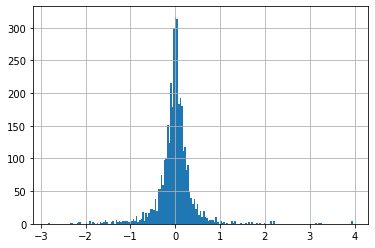

In [44]:
## Get delta_price
twitter_df['delta_price'] = twitter_df['stock_price_post'] - twitter_df['stock_price_tweet']
twitter_df['delta_price'].hist(bins='auto')

In [57]:
def get_delta_price_class(x):
    if x<0:
        class_ = 'decrease'
    elif x>0:
        class_ = 'increase'
    elif x==0:
        class_ = 'no change'
    else:
        class_ = np.nan
    return class_

In [58]:
twitter_df['delta_price_class'] = twitter_df['delta_price'].apply(get_delta_price_class)

In [60]:
twitter_df['delta_price_class'].value_counts(normalize=True,dropna=False)#.head()

NaN          0.846878
increase     0.076062
decrease     0.071565
no change    0.005495
Name: delta_price_class, dtype: float64

In [61]:
twitter_df.isna().sum()

source                   0
content                  0
date                     0
retweet_count            0
favorite_count           0
is_retweet              58
id_str                   0
date-fixed               0
tweet_minute             0
tweet_freq               1
stock_price_tweet    19286
stock_time               0
stock_price_post     18588
delta_price          20342
delta_price_class    20342
dtype: int64

In [62]:
twitter_df_small = twitter_df.loc[ twitter_df['delta_price'].notnull()]
twitter_df_small

,source,content,date,retweet_count,favorite_count,is_retweet,id_str,date-fixed,tweet_minute,tweet_freq,stock_price_tweet,stock_time,stock_price_post,delta_price,delta_price_class
date-fixed,,,,,,,,,,,,,,,
2020-07-11 14:44:28,Twitter for iPhone,RT @GreggJarrett: Pelosi Shrugs Off Mobs ‘People Will Do What They Do’ Tells Young People Everyt...,2020-07-11 18:44:28,4728,0,True,1282022963987054592,2020-07-11 14:44:28,2020-07-11 14:45:00,00:00:31,-999.00,2020-07-11 15:45:00,-999.00,0.00,no change
2020-07-11 14:43:57,Twitter for iPhone,RT @GreggJarrett: Trump right to commute Roger Stone’s sentence – Stone committed no crime was f...,2020-07-11 18:43:57,8574,0,True,1282022835867791361,2020-07-11 14:43:57,2020-07-11 14:44:00,00:00:10,-999.00,2020-07-11 15:44:00,-999.00,0.00,no change
2020-07-11 14:43:47,Twitter for iPhone,RT @GreggJarrett: Biased anti-Flynn rogue judge exceeds authority by refusing to dismiss wrongfu...,2020-07-11 18:43:47,6188,0,True,1282022791857025025,2020-07-11 14:43:47,2020-07-11 14:44:00,00:00:52,-999.00,2020-07-11 15:44:00,-999.00,0.00,no change
2020-07-11 14:42:55,Twitter for iPhone,RT @TVNewsHQ: Fox News’ @GreggJarrett on President Trump’s commutation of Roger Stone sentence: ...,2020-07-11 18:42:55,3612,0,True,1282022576441700356,2020-07-11 14:42:55,2020-07-11 14:43:00,05:26:55,-999.00,2020-07-11 15:43:00,-999.00,0.00,no change
2020-07-11 09:16:00,Twitter for iPhone,RT @realDonaldTrump: President Trump Approval Rating in the Republican Party at 96%. Thank You!,2020-07-11 13:16:00,39286,0,True,1281940302782136320,2020-07-11 09:16:00,2020-07-11 09:16:00,00:00:42,-999.00,2020-07-11 10:16:00,-999.00,0.00,no change
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-06 11:01:58,Twitter for iPhone,HAPPY BIRTHDAY to my son @EricTrump! Very proud of you!https://t.co/ZHMKIqnUwL https://t.co/IJzW...,2016-01-06 15:01:58,1732,7517,False,684751768522194944,2016-01-06 11:01:58,2016-01-06 11:02:00,00:36:30,77.64,2016-01-06 12:02:00,77.57,-0.07,decrease
2016-01-06 10:25:28,Twitter for Android,Germany is going through massive attacks to its people by the migrants allowed to enter the cou...,2016-01-06 14:25:28,7796,13312,False,684742583520722944,2016-01-06 10:25:28,2016-01-06 10:26:00,10:25:42,77.71,2016-01-06 11:26:00,77.83,0.12,increase
2016-01-05 14:05:19,Twitter Web Client,@longtalltexan20 @realDonaldTrump I love it when TRUMP calls out MSM for what they really are! ...,2016-01-05 18:05:19,1327,4012,False,684435524346613765,2016-01-05 14:05:19,2016-01-05 14:06:00,00:11:46,78.42,2016-01-05 15:06:00,78.47,0.05,increase


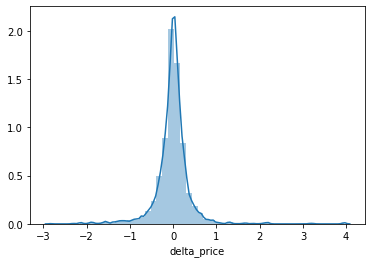

In [63]:
sns.distplot(twitter_df_small['delta_price'])

In [64]:
twitter_df_small['delta_price_class'].value_counts(normalize=True,dropna=False)

increase     0.496737
decrease     0.467374
no change    0.035889
Name: delta_price_class, dtype: float64

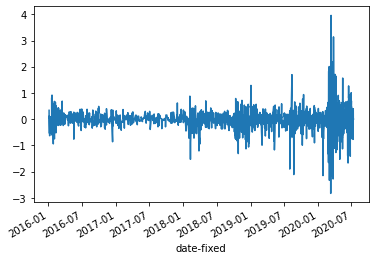

In [50]:
twitter_df_small['delta_price'].plot()

In [67]:
# # make the proper time intervals
time_intervals = pd.interval_range(start=stock_ts.index[0],
                                   end=stock_ts.index[-1],closed='right',
                                   freq=stock_ts.index.freq)
time_intervals[-1]
# if return_interval_dicts==True:
#     ## MAKE DICTIONARY FOR LOOKING UP INTEGER CODES FOR TIME INTERVALS
#     bin_int_index = dict(zip( range(len(time_intervals)),
#                             time_intervals))

#     ## MAKE MAPPER DICTIONARY TO TURN INTERVALS INTO INTEGER BINS
#     bin_to_int_mapper = {v:k for k,v in bin_int_index.items()}


Interval('2020-07-10 15:59:00', '2020-07-10 16:00:00', closed='right')

### Pasting Code for Combining Stocks and Tweets as Reference

In [68]:
# MAKE TIME INTERVALS BASED ON BUSINESS HOUR START (09:30-10:30)
# time_intervals= \
# ji.make_time_index_intervals(stock_df.reset_index(drop=True),
#                              col='date_time_index', 
#                              closed='right',
#                              return_interval_dicts=False) 
fs.ihelp(ji.make_time_index_intervals)

------------------------------------------------------------------------------------
------ SOURCE ----------------------------------------------------------------------


```python
def make_time_index_intervals(twitter_df,col ='B_ts_rounded', start=None,end=None, closed='right',return_interval_dicts=False,freq='H'):#,num_offset=1):#col used to be 'date'
    """Takes a df, rounds first timestamp down to nearest hour, last timestamp rounded up to hour.
    Creates 30 minute intervals based that encompass all data.
    If return_interval_dicts == False, returns an interval index.
    If reutn_as_mappers == True, returns interval_index, bin_int_index, bin_to_int_mapper"""
    import pandas as pd
    time_index = twitter_df[col].copy()
    
    copy_idx = time_index.index.to_series() 
    time_index.index = pd.to_datetime(copy_idx)
    time_index.sort_index(inplace=True)

    ts = time_index.index[0]
    ts_end  = time_index.index[-1]

    if start is None:
        start = pd.to_datetime(f"{ts.month}-{ts.day}-{ts.year} 09:30:00")
    else:
        start = pd.to_datetime(start)
    if end is None:
        end = pd.to_datetime(f"{ts_end.month}-{ts_end.day}-{ts_end.year} 16:30:00")
        end = pd.to_datetime(end)


    # make the proper time intervals
    time_intervals = pd.interval_range(start=start,end=end,closed=closed,freq=freq)

    if return_interval_dicts==True:
        ## MAKE DICTIONARY FOR LOOKING UP INTEGER CODES FOR TIME INTERVALS
        bin_int_index = dict(zip( range(len(time_intervals)),
                                time_intervals))

        ## MAKE MAPPER DICTIONARY TO TURN INTERVALS INTO INTEGER BINS
        bin_to_int_mapper = {v:k for k,v in bin_int_index.items()}

        return time_intervals, bin_int_index, bin_to_int_mapper
    else:
        return time_intervals

```

In [69]:
## USE THE TIME INDEX TO FILTER OUT TWEETS FROM THE HOUR PRIOR
# twitter_df, bin_codes = ji.bin_df_by_date_intervals(twitter_df ,time_intervals)
# stock_df, bin_codes_stock = ji.bin_df_by_date_intervals(stock_df.reset_index(drop=True), time_intervals, column='date_time_index')
# stock_df
fs.ihelp(ji.bin_df_by_date_intervals)

------------------------------------------------------------------------------------
------ SOURCE ----------------------------------------------------------------------


```python
def bin_df_by_date_intervals(test_df,time_intervals,column='date', return_codex=True):
    """Uses pd.cut with half_hour_intervals on specified column.
    Creates a dictionary/map of integer bin codes. 
    Adds column"int_bins" with int codes.
    Adds column "left_edge" as datetime object representing the beginning of the time interval. 
    Returns the updated test_df and a list of bin_codes."""
    import pandas as pd
    # Cut The Date column into interval bins, 
    # cut_date = pd.cut(test_df[column], bins=time_intervals)#,labels=list(range(len(half_hour_intervals))), retbins=True)
    # test_df['int_times'] = cut_date    
    test_df['int_times'] = pd.cut(test_df[column], bins=time_intervals)#,labels=list(range(len(half_hour_intervals))), retbins=True)
    test_df['int_bins'] = test_df['int_times'].cat.codes
    test_df['left_edge'] = test_df['int_times'].apply(lambda x: x.left)

    if return_codex:
        bin_codex = dict(enumerate(time_intervals))


    # # convert to str to be used as group names/codes
    # unique_bins = cut_date.astype('str').unique()
    # num_code = list(range(len(unique_bins)))
    
    # # Dictioanry of number codes to be used for interval groups
    # bin_codes = dict(zip(num_code,unique_bins))#.astype('str')

    
    # # Mapper dictionary to convert intervals into number codes
    # bin_codes_mapper = {v:k for k,v in bin_codes.items()}

    
    # # Add column to the dataframe, then map integer code onto it
    # test_df['int_bins'] = test_df['int_times'].astype('str').map(bin_codes_mapper)
    # test_df.dropna(subset=['int_times'],inplace=True)
    # Get the left edge of the bins to use later as index (after grouped)
    # left_out, _ =int_to_ts(test_df['int_times'])#.apply(lambda x: int_to_ts(x))    
    # try:
    #     edges =int_to_ts(test_df['int_times'])#.apply(lambda x: int_to_ts(x))    
    #     left_out = [edge[0] for edge in edges]
    #     test_df['left_edge'] = pd.to_datetime(left_out)
    # except:
    #     print('int_to_ts output= ',left_out)
    

    # bin codes to labels 
    # bin_codes = [(k,v) for k,v in bin_codes.items()]
    
    return test_df, bin_codex

```

In [70]:
# ## COLLAPSE DFs BY CODED BINS
# twitter_grouped = ji.collapse_df_by_group_index_col(twitter_df,
#                                                     group_index_col='int_bins',
#                                                     drop_orig=True,
#                                                     verbose=0)

# stocks_grouped = ji.collapse_df_by_group_index_col(stock_df,
#                                                     drop_orig=True,
#                                                     group_index_col='int_bins', 
#                                                   verbose=0)
# # display(twitter_grouped.head(2),stocks_grouped.head(2))
fs.ihelp(ji.collapse_df_by_group_index_col)

------------------------------------------------------------------------------------
------ SOURCE ----------------------------------------------------------------------


```python
def collapse_df_by_group_index_col(twitter_df,group_index_col='int_bins',date_time_index_col = None, drop_orig=False, unpack_all=True, debug=False, verbose=1):#recast_index_freq=False, verbose=1):
    """Loops through the group_indices provided to concatenate each group into
    a single row and combine into one dataframe with the ______ as the index"""
    import numpy as np
    import pandas as pd
    from IPython.display import display
    import bs_ds_local as bs

    import numpy as np
    import pandas as pd
    if verbose>1:
        clock = bs.Clock()
        clock.tic('Starting processing')

    if date_time_index_col is None:
        twitter_df['date_time_index'] = twitter_df.index.to_series()
    else:
        twitter_df['date_time_index'] = twitter_df[date_time_index_col]
    twitter_df['date_time_index'] = pd.to_datetime(twitter_df['date_time_index'])
    cols_to_drop = []

    # Get the groups integer_index and current timeindex values 
    group_indices = twitter_df.groupby(group_index_col).groups
    group_indices = [(k,v) for k,v in group_indices.items()]
    # group_df_index = [x[0] for x in group_indices]


    # Create empty shell of twitter_grouped dataframe
    twitter_grouped = pd.DataFrame(columns=twitter_df.columns, index=[x[0] for x in group_indices])

    # twitter_grouped['num_tweets'] = 0
    # twitter_grouped['time_bin'] = 0


    # Loop through each group_indices
    for (int_bin,group_members) in group_indices:
        # group_df = twitter_df.loc[group_members]
        # combined_series = concatenate_group_data(group_df)

        ## REPLACE COMBINED SERIES WITH:
        twitter_grouped.loc[int_bin] =  twitter_df.loc[group_members].apply(lambda x: [x.to_numpy()]).to_numpy()

        ## NEW::
        # twitter_grouped.loc[int_bin].apply(lambda x: x[:])
        # twitter_grouped['num_tweets'].loc[int_bin] = len(group_members)


    ## FIRST, unpack left_edge since you only want one item no matter how long.
    twitter_grouped['time_bin'] = twitter_grouped['left_edge'].apply(lambda x: x[0])
    twitter_grouped['num_per_bin'] = twitter_grouped[group_index_col].apply(lambda x: len(x))
    cols_to_drop.append('left_edge') 

    # ## Afer combining, process the columns as a whole instead of for each series:
    # def unpack_x(x):
    #     if len(x)<=1:
    #         return x[0]
    #     else:
    #         return x[:]

    # for col in twitter_grouped.columns:
    #     if 'time_bin' in col:
    #         continue
    #     else:
    #         twitter_grouped[col] = twitter_grouped[col].apply(lambda x: unpack_x(x))
    
    ## NOW PROCESS THE COLUMNS THAT NEED PROCESSING    
    cols_to_sum = ['retweet_count','favorite_count']
    for col in cols_to_sum:
        try:
            twitter_grouped['total_'+col] = twitter_grouped[col].apply(lambda x: np.sum(x))
            cols_to_drop.append(col)
        except:
            if debug:
                print(f"Columns {col} not in df")


    ## Combine string columns 
    str_cols_to_join = ['content']#,'id_str']
    for col in str_cols_to_join:
        # print(col)

        def join_or_return(x):

            # if isinstance(x,list):
            #     return ','.join(x)
            # else:
            #     return (x)

            if len(x)==1:
                return str(x[0])
            else:
                return ','.join(x)
        
        try:
            twitter_grouped['group_'+col] = twitter_grouped[col].apply(lambda x:join_or_return(x)) #','.join(str(x)))
            cols_to_drop.append(col)
        except:
            print(f"Columns {col} not in df")


    ## recast dates as pd.to_datetime
    date_cols =['date']
    for col in date_cols:
        try:
            twitter_grouped[col] = twitter_grouped[col].apply(lambda x: list(pd.to_datetime(x).strftime('%Y-%m-%d %T')))
        except:
            print(f"Columns {col} not in df")

    # final_cols_to_drop = ['']
    #     cols_to_drop.append(x) for x in     
    if drop_orig:
        twitter_grouped.drop(cols_to_drop,axis=1,inplace=True)
    
    if unpack_all:
        def unpack(x):
            if len(x)==1:
                return x[0]
            else:
                return x
        
        for col in twitter_grouped.columns:
            try:
                twitter_grouped[col] = twitter_grouped[col].apply(lambda x: unpack(x))
            except:
                twitter_grouped[col] =  twitter_grouped[col]
                if debug:
                    print(f'Error with column {col}')

    if verbose>1:

        clock.toc('completed')

    ## Replace 'int_bins' array column with index-> series
    twitter_grouped['int_bins'] = twitter_grouped.index.to_series()

    return twitter_grouped

```

In [73]:
ihelp(ji.merge_stocks_and_tweets)

------------------------------------------------------------------------------------
------ HELP ------------------------------------------------------------------------

Help on function merge_stocks_and_tweets in module functions_nlp:

merge_stocks_and_tweets(stocks_grouped, twitter_grouped, on='int_bins', how='left', show_summary=True)
    Takes stocks_grouped and twitter_grouped dataframes grouped by hour bins, merges
    them on the 'int_bins' columns.

------------------------------------------------------------------------------------
------ SOURCE ----------------------------------------------------------------------


```python
def merge_stocks_and_tweets(stocks_grouped,twitter_grouped, on='int_bins',how='left', show_summary=True):
    """Takes stocks_grouped and twitter_grouped dataframes grouped by hour bins, merges
    them on the 'int_bins' columns."""
    import pandas as pd
    import numpy as np
    import functions_combined_BEST as ji
    from IPython.display import display

    def fix_tweet_times(x):
        time_format="%Y-%m-%d %T"
        if isinstance(x,pd.Timestamp) | isinstance(x,pd.DatetimeIndex):
            return x.strftime(time_format)

        elif  isinstance(x,list) |  isinstance(x,np.ndarray):
            ts = [pd.to_datetime(t,format=time_format) for t in x] 
    #         ts = [t.strftime(time_format) for t in x]#ts]
            return ts

        elif pd.isnull(x): 
    #         print('null')
            return x

        else: 
            ts= pd.to_datetime(str(x)) 
            timestring = ts.strftime(time_format)        #x.strftime(time_format)
            return timestring

    ## MERGE DATAFRAMES
    df_combined = pd.merge(stocks_grouped,twitter_grouped, on='int_bins',how='left')#,indicator=True)

    ## ADDING COLUMNS TO WEED THROUGH MISSING DATA FROM MERGER
    df_combined['has_tweets'] = ~df_combined['group_content'].isna()
    df_combined['has_stocks'] = ~df_combined['price'].isna()
    df_combined['has_both'] =(df_combined['has_tweets']==True) & (df_combined['has_stocks']==True)# 


    ## CLEAN UP DATAFRAME
    # Drop redundant cols
    drop_cols = ['date','int_times_y','time_bin_y','time_bin_x','num_per_bin_x']
    df_combined.drop(drop_cols,axis=1,inplace=True)

    # Rename distinct stock vs tweet columns
    rename_map = {'date_time_index_y':'tweet_times',
                 'date_time_index_x':'stock_times',
                  'int_times_x':'int_times',
                  'num_per_bin_y':'num_tweets',
                  'int_times_x':'int_tweets_for_stocks'
                 }
    df_combined  = df_combined.rename(axis=1,mapper=rename_map)

    ## Add fixed ts for tweet_times
    df_combined['tweet_times'] = df_combined['tweet_times'].apply(lambda x: fix_tweet_times(x))

    df_combined.set_index('date_time', inplace=True,drop=False)

    if show_summary:
        n=3
        display(df_combined.groupby('has_both').head(3))
        display(df_combined.loc[ df_combined['num_tweets']>1].head(n))
    return df_combined

```

In [74]:
# ## STOCKS AND TWEETS 
# stocks_grouped['date_time'] = stocks_grouped.index.to_series()
# df_combined = ji.merge_stocks_and_tweets(stocks_grouped, 
#                                       twitter_grouped,
#                                       on='int_bins',how='left',
#                                       show_summary=False)

# ORIGINAL ORDER RESUMES

In [75]:
twitter_df_small.to_csv('data/twitter_df_small.csv')

In [76]:
# # 1. create minimally cleaned column `content_min_clean` with urls
# twitter_df = ji.full_twitter_df_processing(twitter_df,
#                                            raw_tweet_col='content',
#                                            name_for_cleaned_tweet_col='content_cleaned',
#                                            name_for_stopped_col='cleaned_stopped_content', 
#                                            name_for_tokenzied_stopped_col='cleaned_stopped_tokens',
#                                            use_col_for_case_ratio='content', 
#                                            use_col_for_sentiment='content_min_clean',
#                                            RT=True, urls=True, hashtags=True, mentions=True,
#                                            str_tags_mentions=True,force=True)
# #                                            stopwords_list=frequent_words, force=True)
# #                                            stopwords_list=stop_words, force=True)
# ## Display Index information
# ji.index_report(twitter_df,label='twitter_df')

# ## Check for strings that exceed the correct tweet length
# keep_idx = ji.check_length_string_column(twitter_df, 'content_min_clean',length_cutoff=400,display_describe=False)
# ## verify no issues arise.
# if keep_idx.isna().sum()>0:
#     raise Exception('')
# else:
#     twitter_df=twitter_df[keep_idx]
#     print(f'removed {np.sum(keep_idx==False)}')

# ji.check_length_string_column(twitter_df, 'content_min_clean',length_cutoff=400,return_keep_idx=False)
# twitter_df.head(2)

### New - 09/21/19
- Removing 'starts_RT' tweets

In [77]:
# display(twitter_df['is_retweet'].value_counts())

# twitter_df = twitter_df.query('is_retweet == False')
# display(twitter_df['is_retweet'].value_counts())

In [ ]:
# # Dropping columns about retweets
# drop_cols = ['has_RT','content_starts_RT','starts_RT']
# twitter_df.drop(drop_cols,axis=1,inplace=True)

In [78]:
# from fsds_100719.imports import *
# fs.ihelp(ji.display_same_tweet_diff_cols)

In [79]:
# ji.display_same_tweet_diff_cols(twitter_df)

In [80]:
# ## Search all tweets for occurances of specific words
# word = 'fed'
# idx_russia_tweets = ji.search_for_tweets_with_word(twitter_df, word =word,
#                                      display_n=5, from_column='content',
#                                      return_index=True, display_df=True)

### Calculating `delta_price_class` for Each Tweet
#### Using S&P 500 Price  1-min-resolution for `delta_price`

In [81]:
# func_list = [ji.load_raw_stock_data_from_txt, 
#             ji.set_timeindex_freq,
#             ji.load_twitter_df_stock_price]

# ji.ihelp_menu(func_list)
# ji.save_ihelp_menu_to_file(func_list,'_stock_data_to_twitter_data')

#### Add Delta Stock Price Data - For *Each* Tweet

In [82]:

# ji.column_report(twitter_df,as_qgrid=False,as_df=True)

In [83]:
# print(f"[i] # number of tweets = {twitter_df.shape[0]}")

# ## add stock_price for twitter_df
# null_ratio = ji.check_null_small(twitter_df,null_index_column='case_ratio')

# print(f'[!] {len(null_ratio)} null values for "case_ratio" are tweets containing only urls. Dropping...')
# twitter_df.dropna(subset=['is_retweet','case_ratio'],inplace=True)
# print(f"[i] New # of tweets = {twitter_df.shape[0]}\n")

In [84]:
# reload(ji)
# # stock_df = pd.read_excel('data/SP500_1min_01_23_2020.xlsx')
# stock_df = pd.read_excel('data/SP500_1min_01_23_2020.xlsx',parse_dates=False)
# stock_df.head()

In [85]:
# date_time_index = stock_df["Date"].astype('str') + ' '+stock_df['Time'].astype('str')
# stock_df['date_time_index'] = pd.to_datetime(date_time_index)

In [ ]:
# date_time_index = (stock_df['Date'].astype('str')+' '+stock_df['Time'])#.rename('date_time_index')
# date_time_index

In [86]:
# twitter_df = ji.load_twitter_df_stock_price(twitter_df, 
#                                             stock_price_file='data/SP500_1min_01_23_2020.xlsx',
#                                            get_stock_prices_per_tweet=True,
#                                            price_mins_after_tweet=60)

# ji.index_report(twitter_df);

In [87]:
# idx_null_delta = ji.check_null_small(twitter_df,null_index_column='delta_price');
# print(f"[!] {len(idx_null_delta)} null values for 'delta_price' were off-hour tweets,\
# more than 1 day before the market reopened. Dropping...")
# twitter_df.dropna(subset=['delta_price'], inplace=True)

# print(f"\n[i] Final # of tweets = {twitter_df.shape[0]}")

In [ ]:
# ji.column_report(twitter_df, as_df=True)

### Determining Cutoffs for Delta Price Classes

In [88]:
# ## Examine delta_price
# print("CURRENT # OF POSTITIVE AND NEGATIVE PRICE DELTAS:")
# print(twitter_df['delta_price_class'].value_counts())

# ## Examining Changes to classes if use a "No Change" cutoff of $0.05
# delta_price = twitter_df['delta_price']
# small_pos =[ 0 < x <.05 for x in delta_price] #/len(delta_price)
# small_neg = [-.05<x <0 for x in delta_price]

# print('\nCHANGES TO CLASSES IF USING ATHRESHOLD OF $0.05:\n','---'*12)
# print(f'# Positive Delta -> "No Change" = {np.sum(small_pos)}')
# print(f'# Negative Delta -> "No Change" = {np.sum(small_neg)}')
# print(f'# of Unchanged Classifications =  {len(delta_price)-(np.sum(small_pos)+np.sum(small_neg))}')

In [89]:
# ## BIN DELTA PRICE CLASS
# bins = pd.IntervalIndex.from_tuples([ (-np.inf,-.05), (-.05,.05), (.05,np.inf)], closed='left')
# ## Save indexer column for 'delta_price'
# twitter_df['indexer'] = bins.get_indexer(twitter_df['delta_price'])

# # remap -1,0,1,2 to classes
# mapper ={-1:np.nan, 0:0, 1:1,2:2}
# # remap string classes
# mapper2 = {0:'neg', 1:'no_change',2:'pos'}

# ## Use indexer to map new integer values
# twitter_df['delta_price_class_int']= twitter_df['indexer'].apply(lambda x: mapper[x])
# twitter_df['delta_price_class'] = twitter_df['delta_price_class_int'].apply(lambda x: mapper2[x])

# ## Verify mapping of string and integer classes
# res1 = pd.DataFrame(twitter_df['delta_price_class'].value_counts())
# res2 = pd.DataFrame(twitter_df['delta_price_class_int'].value_counts())
# bs.display_side_by_side(res1,res2)

## EXPLORE/VISUALIZE 
### Delta Price Classes

In [90]:
# twitter_df.to_csv('data/_twitter_df_with_stock_price.csv')

In [91]:
# ji.plotly_price_histogram(twitter_df,show_fig=True,as_figure=False)
# ji.plotly_pie_chart(twitter_df, column_to_plot='delta_price_class',show_fig=True, as_figure=False)

### NLP by Delta Price Class

- For comparison of words and bigrams, we will exclude the 'no change' class. 

In [92]:
# # twitter_df['delta_price_class']
# bs.check_null_small(twitter_df)

In [93]:
# nlp_df = twitter_df.loc[twitter_df['delta_price_class']!='no_change'].copy()
# # nlp_df.dropna(inplace=True)
# nlp_df.head(2)

In [94]:
# fs.ihelp(ji.compare_word_clouds,0)

In [95]:
# # Generate wordclouds
# twitter_df_groups,twitter_group_text = ji.get_group_texts_for_word_cloud(nlp_df, 
#                                                                       text_column='cleaned_stopped_lemmas', 
#                                                                       groupby_column='delta_price_class')


# ji.compare_word_clouds(text1=twitter_df_groups['pos']['joined'],
#                        label1='Stock Market Increased',
#                        text2= twitter_df_groups['neg']['joined'],
#                        label2='Stock Market Decreased',
#                        twitter_shaped = True, verbose=1,
#                        suptitle_y_loc=0.75,
#                        suptitle_text='Most Frequent Words by Stock Price +/- Change',
#                        wordcloud_cfg_dict={'collocations':True},
#                        save_file=True,filepath_folder='',
# #                        png_filename=file_dict['nlp_figures']['word_clouds_compare'],
#                       **{'subplot_titles_fontdict':{'fontsize':26,'fontweight':'bold'},
#                         'suptitle_fontdict':{'fontsize':40,'fontweight':'bold'},
#                          'group_colors':{'group1':'green','group2':'red'},
#                         });

In [96]:
# ## Comparing words ONLY unique to each group
# df_pos_words, df_neg_words = ji.compare_freq_dists_unique_words(text1=twitter_df_groups['pos']['text_tokens'],
#                                                                 label1='Price Increased',
#                                                                 text2=twitter_df_groups['neg']['text_tokens'],
#                                                                 label2='Price Decreased',
#                                                                 top_n=20, display_dfs=True,
#                                                                 return_as_dicts=False)

# pos_freq_dict, neg_freq_dict = ji.compare_freq_dists_unique_words(text1=twitter_df_groups['pos']['text_tokens'],
#                                                                 label1='Price Increased',
#                                                                 text2=twitter_df_groups['neg']['text_tokens'],
#                                                                  label2='Price Decreased',
#                                                                 top_n=20, display_dfs=False,
#                                                                 return_as_dicts=True)


# ## WORDCLOUD OF WORDS UNIQUE TO TWEETS THAT INCREASED VS DECREASED STOCK PRICE
# ji.compare_word_clouds(text1= pos_freq_dict,label1='Stock Price Increased',
#                        text2=neg_freq_dict, label2='Stock Price Decreased',
#                        twitter_shaped=True, from_freq_dicts=True,
#                        suptitle_y_loc=0.75,wordcloud_cfg_dict={'collocations':True},
#                        suptitle_text='Words Unique to Stock Price +/- Change',
#                        save_file=True,filepath_folder='',
# #                        png_filename=file_dict['nlp_figures']['word_clouds_compare_unique'],
#                        **{'subplot_titles_fontdict':
#                          {'fontsize':26,
#                          'fontweight':'bold'},
#                         'suptitle_fontdict':{
#                          'fontsize':40,
#                          'fontweight':'bold'},
#                          'group_colors':{
#                              'group1':'green','group2':'red'}
#                         });

In [97]:
# ji.make_tweet_bigrams_by_group(twitter_df_groups)

# INITIAL MODELING - V2.0

In [109]:
twitter_df.head()

,source,content,date,retweet_count,favorite_count,is_retweet,id_str,date-fixed,tweet_minute,tweet_freq,stock_price_tweet,stock_time,stock_price_post,delta_price,delta_price_class,date_time_index
date-fixed,,,,,,,,,,,,,,,,
2020-07-11 14:44:28,Twitter for iPhone,RT @GreggJarrett: Pelosi Shrugs Off Mobs ‘People Will Do What They Do’ Tells Young People Everyt...,2020-07-11 18:44:28,4728,0,True,1282022963987054592,2020-07-11 14:44:28,2020-07-11 14:45:00,00:00:31,-999.0,2020-07-11 15:45:00,-999.0,0.0,no change,2020-07-11 14:44:28
2020-07-11 14:43:57,Twitter for iPhone,RT @GreggJarrett: Trump right to commute Roger Stone’s sentence – Stone committed no crime was f...,2020-07-11 18:43:57,8574,0,True,1282022835867791361,2020-07-11 14:43:57,2020-07-11 14:44:00,00:00:10,-999.0,2020-07-11 15:44:00,-999.0,0.0,no change,2020-07-11 14:43:57
2020-07-11 14:43:47,Twitter for iPhone,RT @GreggJarrett: Biased anti-Flynn rogue judge exceeds authority by refusing to dismiss wrongfu...,2020-07-11 18:43:47,6188,0,True,1282022791857025025,2020-07-11 14:43:47,2020-07-11 14:44:00,00:00:52,-999.0,2020-07-11 15:44:00,-999.0,0.0,no change,2020-07-11 14:43:47
2020-07-11 14:42:55,Twitter for iPhone,RT @TVNewsHQ: Fox News’ @GreggJarrett on President Trump’s commutation of Roger Stone sentence: ...,2020-07-11 18:42:55,3612,0,True,1282022576441700356,2020-07-11 14:42:55,2020-07-11 14:43:00,05:26:55,-999.0,2020-07-11 15:43:00,-999.0,0.0,no change,2020-07-11 14:42:55
2020-07-11 09:16:00,Twitter for iPhone,RT @realDonaldTrump: President Trump Approval Rating in the Republican Party at 96%. Thank You!,2020-07-11 13:16:00,39286,0,True,1281940302782136320,2020-07-11 09:16:00,2020-07-11 09:16:00,00:00:42,-999.0,2020-07-11 10:16:00,-999.0,0.0,no change,2020-07-11 09:16:00


In [160]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from nltk import TweetTokenizer,word_tokenize,regexp_tokenize
from nltk.corpus import stopwords
from string import punctuation

from sklearn import metrics

In [172]:
df_to_model = twitter_df_small.copy()
df_to_model = df_to_model[df_to_model['delta_price_class']!='no change']

In [173]:
X = df_to_model['content'].copy()
y = df_to_model['delta_price_class'].copy()

In [175]:
X_tr,X_te,y_tr,y_te = train_test_split(X,y,stratify=y,test_size=0.2,random_state=321)
X_tr.shape, X_te.shape

((2836,), (710,))

In [208]:
tokenizer = TweetTokenizer(preserve_case=False,strip_handles=True)
stopwords_list = stopwords.words('english')
stopwords_list.extend(punctuation)
stopwords_list.extend(['…','”','“','…','...','rt'])
vectorizer = TfidfVectorizer(tokenizer=tokenizer.tokenize,
                            stop_words=stopwords_list)

In [209]:
X_tr_tfidf = vectorizer.fit_transform(X_tr)
X_te_tfidf = vectorizer.transform(X_te)

In [210]:
X_tr_tfidf

<2836x8513 sparse matrix of type '<class 'numpy.float64'>'
	with 37292 stored elements in Compressed Sparse Row format>

              precision    recall  f1-score   support

    decrease       0.54      0.41      0.46       344
    increase       0.55      0.67      0.60       366

    accuracy                           0.54       710
   macro avg       0.54      0.54      0.53       710
weighted avg       0.54      0.54      0.54       710



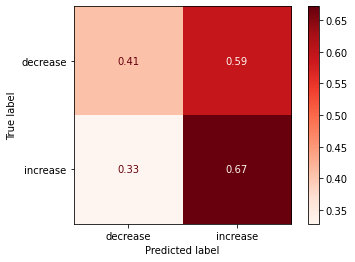

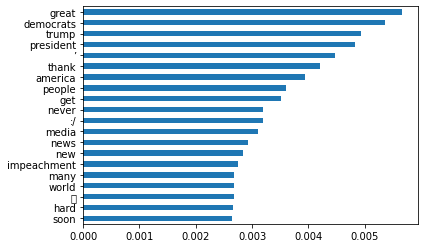

In [211]:
model = RandomForestClassifier()
model.fit(X_tr_tfidf,y_tr)
y_hat_test = model.predict(X_te_tfidf)

print(metrics.classification_report(y_te,y_hat_test))
metrics.plot_confusion_matrix(model,X_te_tfidf,y_te,normalize='true',cmap='Reds')
plt.figure()
importances = pd.Series(model.feature_importances_,index=vectorizer.get_feature_names())
importances.sort_values().tail(20).plot(kind='barh')

              precision    recall  f1-score   support

    decrease       0.00      0.00      0.00       344
    increase       0.52      1.00      0.68       366

    accuracy                           0.52       710
   macro avg       0.26      0.50      0.34       710
weighted avg       0.27      0.52      0.35       710



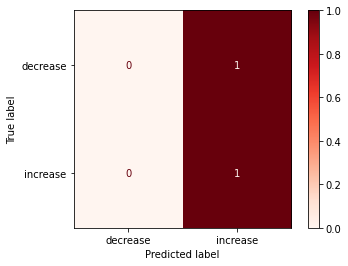

In [212]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_tr_tfidf,y_tr)
y_hat_test = dummy.predict(X_te_tfidf)

print(metrics.classification_report(y_te,y_hat_test))
metrics.plot_confusion_matrix(dummy,X_te_tfidf,y_te,normalize='true',cmap='Reds')

In [217]:
# GridSearch
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

model = RandomForestClassifier()
params = {'max_depth':[None,3,5,10,50],
         'criterion':['gini','entropy'],
         'class_weight':['balanced',None]}

gridsearch = GridSearchCV(model, params, cv=3)#,scoring='recall_macro')
gridsearch.fit(X_tr_tfidf,y_tr)
gridsearch.best_params_

{'class_weight': None, 'criterion': 'entropy', 'max_depth': None}

0.5309859154929577
              precision    recall  f1-score   support

    decrease       0.52      0.44      0.47       344
    increase       0.54      0.62      0.58       366

    accuracy                           0.53       710
   macro avg       0.53      0.53      0.53       710
weighted avg       0.53      0.53      0.53       710



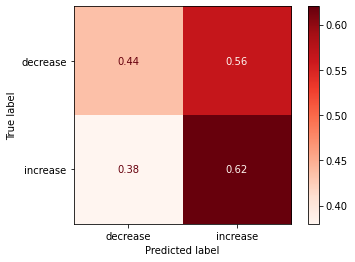

In [225]:
best_model = gridsearch.best_estimator_
y_hat_test = best_model.predict(X_te_tfidf)

print(metrics.classification_report(y_te,y_hat_test))
metrics.plot_confusion_matrix(best_model,X_te_tfidf,y_te,normalize='true',cmap='Reds')

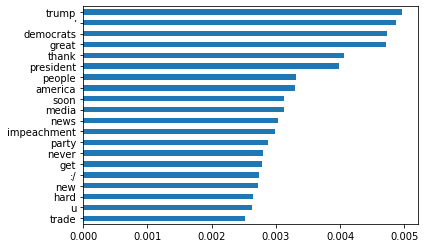

In [219]:
importances = pd.Series(best_model.feature_importances_,index=vectorizer.get_feature_names()).sort_values()
importances.tail(20).plot(kind='barh')

In [220]:
print(importances.tail(20))

trade          0.002526
u              0.002637
hard           0.002647
new            0.002719
:/             0.002743
get            0.002780
never          0.002800
party          0.002876
impeachment    0.002980
news           0.003029
media          0.003122
soon           0.003123
america        0.003302
people         0.003317
president      0.003981
thank          0.004066
great          0.004708
democrats      0.004723
’              0.004874
trump          0.004963
dtype: float64


              precision    recall  f1-score   support

    decrease       0.53      0.39      0.45       344
    increase       0.54      0.67      0.60       366

    accuracy                           0.54       710
   macro avg       0.53      0.53      0.52       710
weighted avg       0.53      0.54      0.53       710



<Figure size 432x288 with 0 Axes>

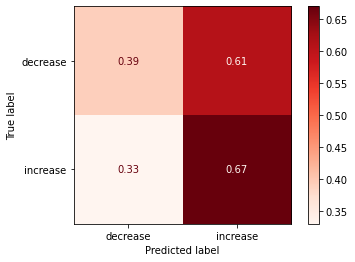

<Figure size 432x288 with 0 Axes>

In [223]:
from sklearn.naive_bayes import MultinomialNB
bayes = MultinomialNB()
bayes.fit(X_tr_tfidf,y_tr)
y_hat_test = bayes.predict(X_te_tfidf)

print(metrics.classification_report(y_te,y_hat_test))
metrics.plot_confusion_matrix(bayes,X_te_tfidf,y_te,normalize='true',cmap='Reds')
plt.figure()
# importances = pd.Series(model.feature_importances_,index=vectorizer.get_feature_names())
# importances.sort_values().tail(20).plot(kind='barh')

# INITIAL MODELING - ORIGINAL

## TWEET DELTA PRICE CLASSIFICATON

### Creating Word Embeddings with Word2Vec

- Good Parameters for Non-Retweets:
```python
params = {
'text_column': 'cleaned_stopped_lemmas',
'window':3,
'min_count':2,
'epochs':10,
'sg':1, 
'hs':0,
'negative':5,
'ns_exponent':-0.5
}
```

In [98]:
# func_list = [ji.make_word2vec_model,ji.get_wv_from_word2vec]#,
#             #ji.get_w2v_kwargs,ji.Word2vecParams]
# ihelp_menu(func_list)
# ji.save_ihelp_menu_to_file(func_list,'_word2vec')

In [99]:
# ## Loading custom class for tracking Word2Vec parameters
# w2vParams = ji.Word2vecParams()        
# w2vParams.params_template()

In [ ]:
reload(ji,bs)

In [ ]:
## FITING WORD2VEC AND TOKENIZER    
model_kwds = {
# 'text_column': 'cleaned_stopped_lemmas',
'window':3,
'min_count':2,
'epochs':10,
'sg':1, 
'hs':0,
'negative':5,
'ns_exponent':-0.5
}
# model_kwds=  ji.get_w2v_kwargs(params)    

# text_data = twitter_df[params['text_column']]
## using df_tokenize for full body of a text for word2vec
word2vec_model = ji.make_word2vec_model(twitter_df,
                                        text_column = 'cleaned_stopped_lemmas',
                                        verbose=1,
                                        return_full=True,
                                        **model_kwds)

# w2vParams.append(params)

wv = word2vec_model.wv

### USING WORD VECTOR MATH TO GET A FEEL FOR QUALITY OF MODEL
wv = word2vec_model.wv
def V(string,wv=wv):
    return wv.get_vector(string)
def equals(vector,wv=wv):
    return wv.similar_by_vector(vector)

list_of_equations = ["V('republican')-V('honor')",
                    "V('man')+V('power')",
                     "V('russia')+V('honor')",
                     "V('china')+V('tariff')",
                     "V('flip')+V('lie')"]

for eqn in list_of_equations:
    print(f'\n* {eqn} =')
    res = eval(f"equals({eqn})")
    [print('\t',x) for x in res]

In [ ]:
# import functions_io as io
# io.save_word2vec(word2vec_model,file_dict,parms_dict=w2vParams.last_params)



### Using Pre-Trained GloVe Twitter Vectors 
- 02-27-20 Moved to modeling section due to X_train requirement

#### Comparing Word Math W2V vs Glove

- Pre-Trained GloVe Twitter download http://nlp.stanford.edu/data/glove.twitter.27B.zip

In [ ]:
## Save Glove Twitter Vectors to A Glove File For Word Math
folder_for_vectors ='/Users/jamesirving/Datasets/glove.twitter.27B/'
glove_file = 'glove.twitter.27B.100d.txt'

# # define full input glove and output word2vec filepaths
# glove_filepath = folder_for_vectors+glove_file
# w2v_filepath = folder_for_vectors+'glove_to_w2vec.txt'
# print(w2v_filepath)
# print(glove_filepath)

# ## Load in saved glove vectors using KeyedVectors.load_word2vec_format()
# from gensim.models import Word2Vec, KeyedVectors
# from gensim.scripts.glove2word2vec import glove2word2vec
# glove2word2vec(glove_filepath,w2v_filepath)
# glovew2v_model = KeyedVectors.load_word2vec_format(w2v_filepath)
# wvg = glovew2v_model.wv

In [ ]:
# def V(string,wv=wvg):
#     return wv.get_vector(string)

# def equals(vector,wv=wvg):
#     return wv.similar_by_vector(vector)

# list_of_equations = ["V('republican')-V('honor')",
#                     "V('man')+V('power')",
#                      "V('russia')+V('honor')",
#                      "V('china')+V('tariff')",
#                      "V('trump')+V('lie')"]

# for eqn in list_of_equations:
#     print(f'\n* {eqn} =')
#     res = eval(f"equals({eqn})")
#     [print('\t',x) for x in res]

### Class Balancing

In [ ]:
## Select smaller subset of twitter_df for df_tokenize
columns_for_model_0 = ['delta_price_class','delta_price','pre_tweet_price',
                       'post_tweet_price','delta_time','B_ts_rounded','B_ts_post_tweet','content',
                       'content_min_clean','cleaned_stopped_content','cleaned_stopped_tokens',
                       'cleaned_stopped_lemmas','delta_price_class_int']

df_tokenize=twitter_df[columns_for_model_0].copy()
ji.check_class_balance(df_tokenize,'delta_price_class_int',as_raw=True, as_percent=False)
ji.check_class_balance(df_tokenize,'delta_price_class',as_raw=False)

In [ ]:
# ji.save_ihelp_to_file(ji.undersample_df_to_match_classes)
ihelp_menu([ji.undersample_df_to_match_classes])

In [ ]:
## RESTRICTING TIME DELTAS FOR MODEL
remove_delta_time_tweets=True

## RESAMPLING 
undersample_to_match_classes = True#True
class_column='delta_price_class'
class_list_to_keep = None # None=all classes or ['neg','pos']

## Display results
show_tweet_versions = True


print('[0] INITIAL CLASS COUNTS.')
## Print initial class balance
ji.check_class_balance(df_tokenize,col=class_column);

## REMOVE TWEETS BASED ON TIME BETWEEN TWEET AND STOCK PRICE VALUE
if remove_delta_time_tweets:
    ## SAMPLE ONLY TWEETS WITHIN 1 DAY OF STOCK MARKET PRICE DATA
    df_sampled = df_tokenize.loc[df_tokenize['delta_time']<'1 day']
    print(f"[1] # OF DAYS REMOVED BY 'delta_time' = {df_tokenize.shape[0]-df_sampled.shape[0]}")
    ji.check_class_balance(df_sampled, col=class_column, as_raw=True, as_percent=False)
else:
    print('[1] Skipping removing tweets by time_delta')
    df_sampled = df_tokenize
    
    
## UNDERSAMPLE FROM UNBALANCED CLASSES
if undersample_to_match_classes:
    
    ## Print status
    if class_list_to_keep is None:
        print_class_list= list(df_sampled[class_column].unique())
    else:
        print_class_list = class_list_to_keep
    print(f'[2] RESAMPLING DF TO MATCH SMALLEST CLASS.\n\tBalancing: {print_class_list}')
    
    ## RESAMPLE TO MATCH CLASSES
    df_sampled = ji.undersample_df_to_match_classes(df_sampled,
                                                    class_column=class_column,
                                                    class_values_to_keep=class_list_to_keep,verbose=0)
    ji.check_class_balance(df_sampled,col=class_column, as_percent=False)
    
    
else:
    print('\n[2] Skipping balancing classes and keeping all 3 classes.')

## Display final output
dash = '---'*20
print(f"\n\n [i] Final class balance:")
ji.check_class_balance(df_sampled,col=class_column)

display(df_sampled.head(2))

show_tweet_versions=True
if show_tweet_versions:
    ji.display_same_tweet_diff_cols(df_sampled,
                                    columns = ['content' ,'content_min_clean',
                                               'cleaned_stopped_content',
                                               'cleaned_stopped_tokens',
                                              'cleaned_stopped_lemmas'],as_md=True)     

In [ ]:
ji.check_class_balance(df_sampled)

### Tokenization, X,y train-test-split

In [ ]:
# ## 
# wv = ji.get_wv_from_word2vec(word2vec_model)
# print(f'Word2Vec Model:\n\tThere are {len(wv.vocab)} words with vector size {wv.vector_size}.')

In [ ]:
# fname = 'shared_memory/df_sampled_test_nlp_models.csv'
# df_sampled.to_csv(fname)

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import text, sequence
from keras.utils import to_categorical
text_data = df_sampled['cleaned_stopped_lemmas']

# Changed for class imblanace  #
y = to_categorical(df_sampled['delta_price_class_int'],num_classes=3)
print(f'y.shape={y.shape}')
tokenizer = Tokenizer(num_words=len(wv.vocab))

## FIGURE OUT WHICH VERSION TO USE WITH SERIES:
tokenizer.fit_on_texts(text_data)
# return integer-encoded sentences
X = tokenizer.texts_to_sequences(text_data)
X = sequence.pad_sequences(X)
MAX_SEQUENCE_LENGTH = X.shape[1]
print(f'Sequence length: {MAX_SEQUENCE_LENGTH}')

## Save word indices
word_index = tokenizer.index_word
reverse_index = {v:k for k,v in word_index.items()}

In [ ]:
## Get training/test split
X_train, X_test,X_val, y_train, y_test,y_val = ji.train_test_val_split(X, y, test_size=0.15, val_size=0.15)

# ji.check_y_class_balance(data=[y_train,y_test])
print('Training Data:')
print(X_train.shape, y_train.shape)
print('Test Data:')
print(X_test.shape, y_test.shape)
print('Val Data:')
print(X_val.shape, y_val.shape)

In [ ]:
fs.ihelp(ji.load_glove_embeddings,0)

In [ ]:
## ADDING PRETRAINED GLOVE EMBEDDINGS
fp = r'/Users/jamesirving/Datasets/glove.twitter.27B/glove.twitter.27B.100d.txt'
word2index, embedding_matrix_gl = ji.load_glove_embeddings(fp,
                                                           encoding='utf-8',
                                                           embedding_dim=100,
                                                           X_train=X_train,
                                                          as_layer=False)

vocab_size = embedding_matrix_gl.shape[0]
vector_size = embedding_matrix_gl.shape[1]

## Model 0

In [ ]:
def save_best_nlp_model(model):
    model_key='nlp_model_for_predictions'
    filename = file_dict[model_key]['base_filename']
    nlp_files = ji.save_model_weights_params(model0,check_if_exists=True,auto_increment_name=True, 
                                         auto_filename_suffix=True,filename_prefix=filename)
    return nlp_files


In [ ]:
func_list = [ji.make_keras_embedding_layer,ji.make_embedding_matrix,
            ji.get_wv_from_word2vec]
ihelp_menu(func_list)
ji.save_ihelp_to_file(func_list[0])

### MAKE KERAS EMBEDDING LAYERS FOR GLOVE AND WORD2VEV


In [ ]:
ji.inspect_variables(locals())

In [ ]:
fs.ihelp(ji.make_embedding_matrix)

In [ ]:
## Make Word2Vec embedding matrix for keras
embedding_matrix_wv = ji.make_embedding_matrix(word2vec_model)
print(f'wv:\n\tshape={embedding_matrix_wv.shape}')


## MAKE WORD2VEC EMBEDDING LAYER
from keras import layers         
## Make word2vec embedding layer
vocab_size = embedding_matrix_wv.shape[0]#len(wv.vocab)
vector_size = embedding_matrix_wv.shape[1]#wv.vector_size

embedding_layer_wv =layers.Embedding(vocab_size,#+1
                                  vector_size,
                                  input_length=X_train.shape[1],
                                  weights=[embedding_matrix_wv],
                                  trainable=False)

### Model 0 - Word2Vec

In [ ]:
## KERAS LSTM WITH WORD2VEC EMBEDDING
from keras import callbacks, models, layers, optimizers, regularizers
## Make model infrastructure:
model0_wv = models.Sequential()

## Get and add embedding_layer
model0_wv.add(embedding_layer_wv)
# model0_wv.add(layers.SpatialDropout1D(0.2))

# model0_wv.add(layers.Bidirectional(layers.LSTM(units=100, return_sequences=True,
#                        dropout=0.5,recurrent_dropout=0.2,
#                        kernel_regularizer=regularizers.l2(.01))))
model0_wv.add(layers.Bidirectional(layers.LSTM(units=100, return_sequences=False,
                       dropout=0.3,recurrent_dropout=0.2,
                       kernel_regularizer=regularizers.l2(.01))))

model0_wv.add(layers.Dense(3, activation='softmax'))

model0_wv.compile(loss='categorical_crossentropy',optimizer="rmsprop",metrics=['acc']) #optimizer="adam"
model0_wv.summary()

In [ ]:
reload([ji,bs])

In [ ]:
## set params
num_epochs = 10
# validation_split = 0.2


clock = bs.Clock()
clock.tic()
dashes = '---'*20
print(f"{dashes}\n\tFITTING MODEL:\n{dashes}")

history0_wv = model0_wv.fit(X_train, y_train, 
                      epochs=num_epochs,
                      verbose=True, 
                      validation_data=(X_val,y_val),#validation_split=validation_split,
                      batch_size=100)#,
#                       callbacks=callbacks)

clock.toc()

In [ ]:
cm_fname = 'models/model_0A/fig_conf_mat.ext'
hist_fname = 'models/model_0A/fig_keras_history.ext'
summary_fname ='models/model_0A/model_summary'

df_class_report0A_wv, fig0A_wv=ji.evaluate_classification_model(model0_wv,
                                                   X_train, X_test,
                                                   y_train, y_test, 
                                                                history=history0_wv,
#                                                    report_as_df=False,
                                                   binary_classes=False,
                                                   conf_matrix_classes=['Decrease','No Change','Increase'],
                                                   normalize_conf_matrix=True, 
                                                   save_history=True, history_filename=hist_fname,
                                                   save_conf_matrix_png=True, conf_mat_filename=cm_fname,
                                                   save_summary=True,summary_filename=summary_fname)

### Model 0 - GloVe

In [ ]:
## MAKE GloVe EMBEDDING LAYER
# word2index, embedding_matrix_gl = ji.load_glove_embeddings(fp,encoding='utf-8',embedding_dim=100)

def load_glove_embedding_layer(fp=None, trainable=False):
    if fp is None:
        fp = r'/Users/jamesirving/Datasets/glove.twitter.27B/glove.twitter.27B.100d.txt'

    ## Make GloVe embedding matrix
    word2index, embedding_matrix_gl = ji.load_glove_embeddings(fp=fp,encoding='utf-8',
                                                               embedding_dim=100,
                                                              X_train=X_train,
                                                              as_layer=False)
    print(f'gl:\n\tshape={embedding_matrix_gl.shape}')

    from keras import layers         
    vocab_size = embedding_matrix_gl.shape[0]#len(wv.vocab)
    vector_size = embedding_matrix_gl.shape[1]#wv.vector_size

    embedding_layer_gl =layers.Embedding(vocab_size,#+1,
                                      vector_size,
                                      input_length=X_train.shape[1],
                                      weights=[embedding_matrix_gl],
                                      trainable=trainable)#,X_train=X_train)
    return word2index, embedding_layer_gl

# glove_word2index, embedding_layer_gl = load_glove_embedding_layer(trainable=True)
glove_word2index, embedding_layer_gl = load_glove_embedding_layer(trainable=False)


In [ ]:
from keras import callbacks, models, layers, optimizers, regularizers
## Make model infrastructure:
model0_gl = models.Sequential()

## Get and add embedding_layer
model0_gl.add(embedding_layer_gl)
model0_gl.add(layers.SpatialDropout1D(0.2))

# model0_gl.add(layers.Bidirectional(layers.LSTM(units=100, return_sequences=True,
#                        dropout=0.5,recurrent_dropout=0.2,
#                        kernel_regularizer=regularizers.l2(.01))))
model0_gl.add(layers.Bidirectional(layers.LSTM(units=100, return_sequences=False)))#,
#                        dropout=0.5,recurrent_dropout=0.2)))#,
#                        kernel_regularizer=regularizers.l2(.01))))

model0_gl.add(layers.Dense(3, activation='softmax'))

model0_gl.compile(loss='categorical_crossentropy',optimizer="adadelta",metrics=['acc']) #optimizer=""rmsprop""
print(model0_gl.summary())

## set params
num_epochs = 15
# validation_split = 0.2
clock = bs.Clock()
clock.tic()
dashes = '---'*20
print(f"{dashes}\n\tFITTING MODEL:\n{dashes}")

history0_gl = model0_gl.fit(X_train, y_train, 
                      epochs=num_epochs,
                      verbose=True, 
                      validation_data=(X_val,y_val),#validation_split=validation_split,
                      batch_size=100)
                      

clock.toc()

In [ ]:
# cm_fname = file_dict['model_0A']['fig_conf_mat.ext']
# hist_fname = file_dict['model_0A']['fig_keras_history.ext']
# summary_fname = file_dict['model_0A']['model_summary']

df_class_report0A_gl,fig0A_gl=ji.evaluate_classification_model(model0_gl,
                                                   X_train, X_test,
                                                   y_train, y_test, 
                                                               history=history0_gl,
#                                                    report_as_df=False,
                                                   binary_classes=False,
                                                   conf_matrix_classes=['Decrease','No Change','Increase'],
                                                   normalize_conf_matrix=True)#, 
#                                                    save_history=True, history_filename=hist_fname,
#                                                    save_conf_matrix_png=True, conf_mat_filename=cm_fname,
#                                                    save_summary=True,summary_filename=summary_fname)

In [ ]:
y_pred_model0_gl = model0_gl.predict(X_test)

In [ ]:
np.mean(np.array([0.47, 0.42, 0.18]))

In [ ]:
def my_custom_scorer(y_true,y_pred, model=None, **kwargs):
    """My custom score function to use with sklearn's GridSearchCV
    Maximizes the average accuracy per class using a normalized confusion matrix"""
    from sklearn.metrics import make_scorer,confusion_matrix
    
    # set labels if provided
    if 'labels' in kwargs:
        labels = kwargs['labels']
    else:
        labels=np.unique(y_true)
    
    if y_true.ndim>1 or y_pred.ndim>1:
    
        ## reduce dimensions of y_train and y_test
        if y_true.ndim>1:            
            y_true = y_true.argmax(axis=1)
        if y_pred.ndim>1:
            y_pred = y_pred.argmax(axis=1)
            
    # Get confusion matrx
    cm = confusion_matrix(y_true, y_pred)
    
    # Normalize confusion matrix
    cm_norm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    
    ## Get diagonals for class accuracy
    diag = cm_norm.diagonal()
    score = np.mean(diag)
    print(f'Mean Class Accuracy = {score}')
    print(f'Class Accuracy Values:')
    print(diag)    
    
    
    ji.plot_confusion_matrix(cm,normalize=True)
    
    return score

In [ ]:
my_custom_scorer(y_test, y_pred_model0_gl)
# np.mean[[0.47058824, 0.42307692 0.18253968]]

In [ ]:
def save_best_nlp_model(model):
    model_key='nlp_model_for_predictions'
    filename = file_dict[model_key]['base_filename']
    nlp_files = ji.save_model_weights_params(model0,check_if_exists=True,auto_increment_name=True, 
                                         auto_filename_suffix=True,filename_prefix=filename)
    return nlp_files


In [ ]:
# save_me_as_model_0A=True
# save_me_as_pred_nlp = False

# ji.reload(ji)
# if save_me_as_pred_nlp:
#     model_key='nlp_model_for_predictions'

# elif save_me_as_model_0A:
#     model_key='model_0A'    
    
# # filename = file_dict[model_key]['base_filename']
# nlp_files = ji.save_model_weights_params(model0_gl,check_if_exists=True,auto_increment_name=True, 
#                                          auto_filename_suffix=True,filename_prefix=filename)

# file_dict[model_key]['output_filenames'] = nlp_files

# ji.update_file_directory(file_dict)

### Kera's Example Pretrained Word Embeddings Network

#### CNN Parameters 
https://machinelearningmastery.com/best-practices-document-classification-deep-learning/

- See notebook `keras_hyperparameter_tuning.ipynb`for gridsearch

```python
# Create HyperParaemeter Space
params_to_search ={'filter_size':[3,4,5,6],
                   'activation':['relu','tanh','linear'],
                   'n_filters':[100,200],#,300,400],
                  'dropout':[0.2],
                  'optimizer':['adam','rmsprop','adadelta'],
                'epochs':[10]}


create_model(embedding_layer=embedding_layer_gl,trainable=False,
              n_filters=100, filter_size=4,
              activation='tanh', optimizer='adadelta',
              dropout=0.2,l2_lr=0.01,
              batch_size=100,
              epochs=10,verbose = 0,show_summary=False)
best results={'activation': 'tanh', 
              'dropout': 0.2,
              'epochs': 10,
              'filter_size': 4,
              'n_filters': 100,
              'optimizer': 'adadelta'}
```

##### Things to Try:
1. Weight Regularization (L2):3 
2. Adadelta Optimizer

In [ ]:
## Get a trainable embedding_layer with GloVe Emebddings
_,embedding_layer_gl=load_glove_embedding_layer(trainable=False)


## Save the initial weights before any training
gl_initial_weights = embedding_layer_gl.get_weights()

In [ ]:
params_to_search ={'filter_size':[3,4,5,6],
                   'activation':['relu','tanh','linear'],
                   'n_filters':[100,200],#,300,400],
                  'dropout':[0.2],
                  'optimizer':['adam','rmsprop','adadelta'],
                'epochs':[10]}

def model_cnn(embedding_layer, X_train, X_test,
              y_train,y_test,
              X_val, y_val,
              n_filters=128, filter_size=4,
              activation='relu', optimizer='rmsprop',
              dropout=0.2,l2_lr=0.01,
              batch_size=128,
              epochs=10,verbose = 1,trainable_embedding=False,show_summary=False):
    
    from keras.layers import Input, Conv1D,GlobalMaxPooling1D, MaxPooling1D, Dense, Dropout
    from keras.models import Model
    from keras.regularizers import l2
    embedding_layer.trainable=trainable_embedding
    print(f'Embedding layer trainable={embedding_layer.trainable}')

    print('Training model.')
    MAX_SEQUENCE_LENGTH = X_train.shape[1]

    # train a 1D convnet with global maxpooling
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedded_sequences = embedding_layer_gl(sequence_input)
    ## Specify layer parameters


    ##
    x = Conv1D(n_filters, filter_size, activation=activation, data_format='channels_first',
               kernel_regularizer=l2(l2_lr), bias_regularizer=l2(l2_lr))(embedded_sequences)
    
    x = Dropout(dropout)(x)
    x = MaxPooling1D(filter_size)(x)
    
    ##
    x = Conv1D(n_filters, filter_size, activation=activation,data_format='channels_first',
              kernel_regularizer=l2(l2_lr), bias_regularizer=l2(l2_lr))(x) 
    x = Dropout(dropout)(x)
    x = MaxPooling1D(filter_size)(x)
    
    ##
    x = Conv1D(n_filters, filter_size, activation=activation,data_format='channels_first',
              kernel_regularizer=l2(l2_lr), bias_regularizer=l2(l2_lr))(x) 
    x = Dropout(dropout)(x)
    x = GlobalMaxPooling1D()(x)
    
    ##
    x = Dense(n_filters, activation='relu')(x) #128
    preds = Dense(3, activation='softmax')(x)

    model = Model(sequence_input, preds)
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer, #'rmsprop',#adam
                  metrics=['acc'])
    
    if show_summary:
        display(model.summary())
    
    
    
    clock = bs.Clock()
    clock.tic(f'units={n_filters}, filter={filter_size},dropout={dropout},opt={optimizer}')
    history = model.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,verbose=verbose,
                        validation_data=(X_val,y_val))

              #validation_split=0.1)
    clock.toc('')
    df_class_report0_CNN,fig0_CNN=ji.evaluate_classification_model(model,
                                                       X_train, X_test,
                                                       y_train, y_test, 
#                                                        report_as_df=False,
                                                                   history=history,
                                                       binary_classes=False,
                                                       conf_matrix_classes=['Decrease','No Change','Increase'],
                                                       normalize_conf_matrix=True)
    
    return model, df_class_report0_CNN

In [ ]:
## Use results from grid search
best_results={'activation': 'tanh', 
              'dropout': 0.2,
              'epochs': 10,
              'filter_size': 4,
              'n_filters': 100,
              'optimizer': 'adadelta'}
outputs= model_cnn(embedding_layer_gl,
                   X_train, X_test,
                   y_train, y_test, 
                   X_val,y_val,l2_lr=0.005,
                   trainable_embedding=False,
                   
                   **best_results)

In [ ]:



def create_model(embedding_layer=embedding_layer_gl,trainable=False,
              n_filters=128, filter_size=4,
              activation='relu', optimizer='rmsprop',
              dropout=0.2,l2_lr=0.01,
              batch_size=100,
              epochs=10,verbose = 0,show_summary=False):
    
    embedding_layer.trainable=trainable
    print(f'Embedding layer trainable={embedding_layer.trainable}')
    from keras.layers import Input, Conv1D,GlobalMaxPooling1D, MaxPooling1D, Dense, Dropout
    from keras.models import Model
    from keras.regularizers import l2

    print('Training model.')
    MAX_SEQUENCE_LENGTH = X_train.shape[1]

    # train a 1D convnet with global maxpooling
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)
    ## Specify layer parameters


    ##
    x = Conv1D(n_filters, filter_size, activation=activation, data_format='channels_first',
               kernel_regularizer=l2(l2_lr), bias_regularizer=l2(l2_lr))(embedded_sequences)
    
    x = Dropout(dropout)(x)
    x = MaxPooling1D(filter_size)(x)
    
    ##
    x = Conv1D(n_filters, filter_size, activation=activation,data_format='channels_first',
              kernel_regularizer=l2(l2_lr), bias_regularizer=l2(l2_lr))(x) 
    x = Dropout(dropout)(x)
    x = MaxPooling1D(filter_size)(x)
    
    ##
    x = Conv1D(n_filters, filter_size, activation=activation,data_format='channels_first',
              kernel_regularizer=l2(l2_lr), bias_regularizer=l2(l2_lr))(x) 
    x = Dropout(dropout)(x)
    x = GlobalMaxPooling1D()(x)
    
    ##
    x = Dense(n_filters, activation=activation )(x) #128'relu'
    preds = Dense(3, activation='softmax')(x)

    model = Model(sequence_input, preds)
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer, #'rmsprop',#adam
                  metrics=['acc'])
    
    if show_summary:
        display(model.summary())
    return model



In [ ]:
def fit_model(model,X_train,y_train,batch_size,epochs,verbose,validation_data):
    
    clock = bs.Clock()
#     clock.tic(f'units={n_filters}, filter={filter_size},dropout={dropout},opt={optimizer}')
    history = model.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,verbose=verbose,
                        validation_data=(X_val,y_val))

              #validation_split=0.1)
    clock.toc('')
    df_class_report0_CNN,fig0_CNN=ji.evaluate_classification(model,history,
                                                       X_train, X_test,
                                                       y_train, y_test, 
                                                       report_as_df=False,
                                                       binary_classes=False,
                                                       conf_matrix_classes=['Decrease','No Change','Increase'],
                                                       normalize_conf_matrix=True)
    
    return model, df_class_report0_CNN

In [ ]:
y_pred_model0_gl = model0_gl.predict(X_test)
# score, cm_norm = my_custom_scorer(y_test,y_pred_model0_gl)
# print(cm_norm, cm_norm.shape)

In [ ]:
RUN_GRID_SEARCH=False

from sklearn.model_selection import GridSearchCV
tune_clock = bs.Clock()
from keras import models, layers
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

neural_network = KerasClassifier(build_fn=create_model,verbose=2)    

best_results={'activation': ['tanh'], 
              'dropout': [0.2],
              'epochs': [10,15],#,20]
              'filter_size': [4,7],
              'batch_size':[50,100,300],
              'n_filters': [100,300],
              'optimizer': ['adadelta'],
             'l2_lr':[0.005,0.003,0.03]}
grid = GridSearchCV(estimator=neural_network,param_grid=best_results,scoring=make_scorer(my_custom_scorer))



if RUN_GRID_SEARCH:
    tune_clock.tic()
    grid_result = grid.fit(X_train, y_train)
    tune_clock.toc()
    grid.best_params_
else:
    print('[!] Grid search skipped (RUN_GRID_SEARCH=FALSE)')

- REsults from overnight gridsearch
-params ran:
```python
params={'activation': ['tanh'], 
              'dropout': [0.2],
              'epochs': [10,15],#,20]
              'filter_size': [4,7],
              'batch_size':[50,100,300],
              'n_filters': [100,300],
              'optimizer': ['adadelta'],
             'l2_lr':[0.005,0.003,0.03]}
```
- best _params

```python

{'activation': 'tanh',
 'batch_size': 100,
 'dropout': 0.2,
 'epochs': 10,
 'filter_size': 4,
 'l2_lr': 0.005,
 'n_filters': 100,
 'optimizer': 'adadelta'}
```

In [ ]:
## Use results from grid search
best_results={'activation': 'tanh', 
              'dropout': 0.2,
              'epochs': 10,
              'filter_size': 4,
              'n_filters': 100,
              'l2_lr':0.005,
              'optimizer': 'adadelta'}
outputs= model_cnn(embedding_layer_gl,
                   X_train, X_test,
                   y_train, y_test, 
                   X_val,y_val,
                   trainable_embedding=False,
                   **best_results)

In [ ]:
# help(GridSearchCV)

In [ ]:
print(pd.datetime.now())

# BOOKMARK 09/28/19

In [ ]:

def create_deep_model(embedding_layer=embedding_layer_gl,trainable=False,
                       n_conv_layers=3,n_filters=128, filter_size=4,
                      activation='tanh', optimizer='adadelta',
                      dropout=0.2,l2_lr=0.005,
                      batch_size=100,
                      epochs=10,verbose = 1):
    
    ## Print out parameters used to create model
    vars = locals()
    dashes = '---'*20
    print('\n\n')
    print(dashes)
    now = pd.datetime.now()
    print(now.strftime('%m/%d/%Y-%T'))
    print(vars)    
    
    embedding_layer.trainable=trainable
    print(f'Embedding layer trainable={embedding_layer.trainable}')
    from keras.layers import Input, Conv1D,GlobalMaxPooling1D, MaxPooling1D, Dense, Dropout
    from keras.models import Model
    from keras.regularizers import l2

    print('Training model.')
    MAX_SEQUENCE_LENGTH = X_train.shape[1]

    # train a 1D convnet with global maxpooling
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)
    ## Specify layer parameters


    ##
    x = Conv1D(n_filters, filter_size, activation=activation, #data_format='channels_first',
               kernel_regularizer=l2(l2_lr), bias_regularizer=l2(l2_lr))(embedded_sequences)
    
    x = Dropout(dropout)(x)
    x = MaxPooling1D(filter_size)(x)
    
    
    
    ## Loop to create n_conv_layers
    
    for n in range(n_conv_layers):
        x = Conv1D(n_filters, filter_size, activation=activation,data_format='channels_first',
                   kernel_regularizer=l2(l2_lr), bias_regularizer=l2(l2_lr))(x) 
        x = Dropout(dropout)(x)
        
        if n==n_conv_layers-1:
            x = GlobalMaxPooling1D()(x)
        else:
            x = MaxPooling1D(filter_size)(x)
    
# #     ##
#     x = Conv1D(n_filters, filter_size, activation=activation,data_format='channels_first',
#               kernel_regularizer=l2(l2_lr), bias_regularizer=l2(l2_lr))(x) 
#     x = Dropout(dropout)(x)
#     x = GlobalMaxPooling1D()(x)
    
    ##
    x = Dense(n_filters, activation=activation )(x) #128'relu'
    preds = Dense(3, activation='softmax')(x)

    model = Model(sequence_input, preds)
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer, #'rmsprop',#adam
                  metrics=['acc'])
    
#     if show_summary:
#     print()
    display(model.summary())
    return model



In [ ]:
from sklearn.model_selection import GridSearchCV
tune_clock = bs.Clock()
from keras import models, layers
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV

neural_network_deep = KerasClassifier(build_fn=create_deep_model,verbose=1)

params_deep_model={'n_conv_layers':[3],#,5],
                  'n_filters': [5,100],#,200],
                 'l2_lr':[0.01],#0.005,
                  'epochs':[10]}
# params_deep_model={'activation': ['tanh'], 
#                    'n_conv_layers':[3,5],
#                   'dropout': [0.2],
#                   'epochs': [10],#,20]
#                   'filter_size': [4],
#                   'batch_size':[100],
#                   'n_filters': [100,200],
#                   'optimizer': ['adadelta'],
#                  'l2_lr':[0.005,0.01]}
grid = GridSearchCV(estimator=neural_network_deep,param_grid=params_deep_model)#,
#                    n_jobs=3)
print(params_deep_model)

if RUN_GRID_SEARCH:
    tune_clock.tic()
    grid_result = grid.fit(X_train, y_train)
    tune_clock.toc()
    results = grid_result.cv_results_
    print(type(results))
    best_deep_params = grid.best_params_
    print(best_deep_params)


In [ ]:
# ihelp(grid_result)

In [ ]:

fit_model_kws={'X_train':X_train, 'y_train':y_train,
                         'batch_size':100, 'epochs':10, 'verbose':True,
                         'validation_data':(X_val,y_val)}

In [ ]:
# model, results = fit_model(create_deep_model(embedding_layer_gl,**best_deep_params),
#                           **fit_model_kws)

In [ ]:

# ji.evaluate_classification_model(grid_result, X_train, X_test, y_train, y_test, 
#                            binary_classes=False,
#                            conf_matrix_classes=['Decrease','No Change','Increase'],
#                            normalize_conf_matrix=True)
# #                                     /               save_history=True, history_filename=hist_fname,
# #                                                    save_conf_matrix_png=True, conf_mat_filename=cm_fname,
# #                                                    save_summary=True,summary_filename=summary_fname))

In [ ]:
# cm_fname = file_dict['model_0A']['fig_conf_mat.ext']
# hist_fname = file_dict['model_0A']['fig_keras_history.ext']
# summary_fname = file_dict['model_0A']['model_summary']

# df_class_report0A,fig0A=ji.evaluate_classification(model,history,
#                                                    X_train, X_test,
#                                                    y_train, y_test, 
#                                                    report_as_df=False,
#                                                    binary_classes=False,
#                                                    conf_matrix_classes=['Decrease','No Change','Increase'],
#                                                    normalize_conf_matrix=True, 
#                                                    save_history=True, history_filename=hist_fname,
#                                                    save_conf_matrix_png=True, conf_mat_filename=cm_fname,
#                                                    save_summary=True,summary_filename=summary_fname)

#### Additional Dense Layers after CNN

In [ ]:
##CNN+ MORE DENSE LAYERS
from keras.layers import Input, Conv1D,GlobalMaxPooling1D, MaxPooling1D, Dense, Dropout,Flatten
from keras.models import Model

print('Training model.')
MAX_SEQUENCE_LENGTH = X_train.shape[1]

# train a 1D convnet with global maxpooling
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer_gl(sequence_input)
## Specify layer parameters
n_units =128
filter_size=4
dropout =0.2
x = Conv1D(n_units, filter_size, activation='relu')(embedded_sequences)
x = Dropout(dropout)(x)
x = MaxPooling1D(filter_size)(x)
x = Conv1D(n_units, filter_size, activation='relu',data_format='channels_first')(x)
x = Dropout(dropout)(x)
x = MaxPooling1D(filter_size)(x)
x = Conv1D(n_units, filter_size, activation='relu')(x)

x = Dropout(dropout)(x)
x = GlobalMaxPooling1D()(x)

# x = Flatten()
x = Dense(1024,activation='relu')(x)
x = Dropout(dropout)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(dropout)(x)

x = Dense(n_units, activation='relu')(x) #128
preds = Dense(3, activation='softmax')(x)

model = Model(sequence_input, preds)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',#'rmsprop',#'adam',#
              metrics=['acc'])
model.summary()

In [ ]:
clock = bs.Clock()
clock.tic('')
history = model.fit(X_train, y_train,
                    batch_size=256,#128,
                    epochs=20,
                    validation_data=(X_val,y_val))
                    
          #validation_split=0.1)
clock.toc('')

In [ ]:
reload(ji)
df_class_report0_CNN,fig0_CNN=ji.evaluate_classification(model,history,
                                                   X_train, X_test,
                                                   y_train, y_test, 
#                                                          history=history,
                                                   report_as_df=False,
                                                   binary_classes=False,
                                                   conf_matrix_classes=['Decrease','No Change','Increase'],
                                                   normalize_conf_matrix=True)

#### Combining Multiple Filters into a Functional CNN Model
- https://medium.com/datadriveninvestor/deep-learning-techniques-for-text-classification-9392ca9492c7 

### Model 0A Summary
Our model had difficulty classifying tweets by `delta_price`, but did perform better than chance (36% accuracy vs chance=33%). We will next attempt to use another type of recurrent-neural-network layer, the Gated Rectifier Unit (GRU).

## Model 0B

In [ ]:
# ## ADDING PRETRAINED GLOVE EMBEDDINGS
# word2index, embedding_matrix = ji.load_glove_embeddings(fp,encoding='utf-8',embedding_dim=100)

# vocab_size = embedding_matrix.shape[0]
# vector_size = embedding_matrix.shape[1]

# from keras import layers         
# embedding_layer =layers.Embedding(vocab_size,#+1,
#                                   vector_size,
#                                   input_length=X_train.shape[1],
#                                   weights=[embedding_matrix],
#                                   trainable=False)

In [ ]:
# model0B.get_

In [ ]:
## GRU Model
from keras import models, layers, optimizers, regularizers
model0B = models.Sequential()

## Get and add embedding_layer
# embedding_layer = ji.make_keras_embedding_layer(wv, X_train)
model0B.add(embedding_layer_gl)

model0B.add(layers.SpatialDropout1D(0.5))
model0B.add(layers.Bidirectional(layers.GRU(units=100, dropout=0.5, recurrent_dropout=0.2,return_sequences=True)))
model0B.add(layers.Bidirectional(layers.GRU(units=100, dropout=0.5, recurrent_dropout=0.2)))
model0B.add(layers.Dense(3, activation='softmax'))

model0B.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['acc'])#,'val_acc'])#, callbacks=callbacks)
model0B.summary()

In [ ]:
num_epochs = 5

clock = bs.Clock()
clock.tic()
historyB = model0B.fit(X_train, y_train, epochs=num_epochs, verbose=True, validation_split=0.1,
                     batch_size=300)#, class_weight=class_weight)#callbacks=callbacks,, validation_data=(X_val))
clock.toc()

In [ ]:
file_dict=io.def_filename_dictionary()
model_key = "model_0B" 
cm_fname = file_dict[model_key]['fig_conf_mat.ext']
hist_fname = file_dict[model_key]['fig_keras_history.ext']
summary_fname = file_dict[model_key]['model_summary']

In [ ]:
reload(ji)
df_class_report0B, fig0B  = ji.evaluate_classification(model0B, historyB, 
                           X_train, X_test, y_train,y_test,report_as_df=False,
                           conf_matrix_classes=['Decrease','No Change','Increase'],
                           binary_classes=False, normalize_conf_matrix=True, 
                           save_history=True, history_filename=hist_fname, 
                           save_conf_matrix_png=True, conf_mat_filename=cm_fname,
                           save_summary=True,summary_filename=summary_fname)

In [ ]:
# save_me_as_model_0B=True
# save_me_as_pred_nlp = True

# ji.reload(ji)
# if save_me_as_pred_nlp:
#     model_key='nlp_model_for_predictions'

# elif save_me_as_model_0B:
#     model_key='model_0B'    
    
# filename = file_dict[model_key]['base_filename']
# nlp_files = ji.save_model_weights_params(model0B,check_if_exists=True,auto_increment_name=True, 
#                                          auto_filename_suffix=True,filename_prefix=filename)

# file_dict[model_key]['output_filenames'] = nlp_files

# ji.update_file_directory(file_dict)
# # ji.dict_dropdown(file_dict)

### Model 0B Summary

The GRU performed better than the LSTM model, with 39% validation accuracy.

In [ ]:
ji.inspect_variables(locals(),show_how_to_delete=False)
del_me= ['one_hot_results','nlp_df','text_data']#list of variable names
for me in del_me:    
    try: 
        exec(f'del {me}')
        print(f'del {me} succeeded')
    except:
        print(f'del {me} failed')
        continue

# FORECASTING STOCK MARKET PRICE

## Loading & Processing Stock Data (SCRUB)

In [ ]:
# DISPLAY CODE TO BE USED BELOW TO LOAD AND PROCESS STOCK DATA
functions_used=[ji.load_processed_stock_data, # This script combines the oriignal 4 used:
                ji.load_raw_stock_data_from_txt,
                ji.set_timeindex_freq,ji.custom_BH_freq,
               ji.get_technical_indicators]

ji.ihelp_menu(functions_used)
ji.save_ihelp_menu_to_file(functions_used,'_stock_df_processing')

## Model 1: Using Price as only feature

### Choosing Appropriate Metrics for Time Series Forecasting

- Due to the estimation of price being a precise regression, accuracy will not be an appropriate metric for judging model performance. 
 - e.g. if the price was \\$ 114.23 and our model predicted \\$ 114.25, our accuracy is 0.<br><br>

- **Thiel's U:**
    - [Source of Equation/Explanation of Metric](https://docs.oracle.com/cd/E57185_01/CBREG/ch06s02s03s04.html)
    - $ U = \sqrt{\frac{\sum_{t=1 }^{n-1}\left(\frac{\bar{Y}_{t+1} - Y_{t+1}}{Y_t}\right)^2}{\sum_{t=1 }^{n-1}\left(\frac{Y_{t+1} - Y_{t}}{Y_t}\right)^2}}$


|Thiel's U Value | Interpretation |
| --- | --- |
| <1 | Forecasting is better than guessing| 
| 1 | Forecasting is about as good as guessing| 
|>1 | Forecasting is worse than guessing|

In [ ]:
import os
os.listdir('data/')

In [ ]:
# fname = file_dict['stock_df']['raw_csv_file']

# ji.load_stock_df_from_csv()
reload(ji)
folderpath='data/'
filename = 'SP500_1min_01_23_2020.xlsx'
raw_stock_df = ji.load_raw_stock_data_from_txt(folderpath=folderpath,filename = filename, verbose=2)
# raw_stock_df =pd.read_excel('data/SP500_1min_01_23_2020.xlsx',parse_dates=False)
'.xlsx' in filename

In [ ]:
# raw_stock_df

In [ ]:
# date_time_index = raw_stock_df["Date"].astype('str') + ' '+stock_df['Time'].astype('str')
# raw_stock_df['date_time_index'] = pd.to_datetime(date_time_index)

In [ ]:
fig = ji.plotly_time_series(raw_stock_df, y_col='BidClose',as_figure=True)
stock_df = ji.get_technical_indicators(raw_stock_df,make_price_from='BidClose')
del raw_stock_df

# SELECT DESIRED COLUMNS
stock_df = stock_df[[
    'price','ma7','ma21','26ema','12ema','MACD','20sd',
    'upper_band','lower_band','ema','momentum']]

# Make stock_price for twitter functions
stock_df.dropna(inplace=True)
ji.index_report(stock_df)
display(stock_df.head(3))

In [ ]:
stock_df.to_csv('data/_stock_df_with_technical_indicators.csv')

In [ ]:
func_list = [ji.train_test_split_by_last_days,
           ji.make_scaler_library,
           ji.transform_cols_from_library,
           ji.make_train_test_series_gens]
ihelp_menu(func_list)
ji.save_ihelp_menu_to_file(func_list,'_stock_data_prep_for_modeling')

In [ ]:
## SPECIFY # OF TRAINING TEST DAYS 
num_test_days=10
num_train_days= 260
### SPECIFY Number of days included in each X_sequence (each prediction)
days_for_x_window=1

# Calculate number of rows to bin for x_windows
periods_per_day = ji.get_day_window_size_from_freq( stock_df, ji.custom_BH_freq() )


## Get the number of rows for x_window 
x_window = periods_per_day * days_for_x_window#data_params['days_for_x_window'] 
print(f'X_window size = {x_window} -- ({days_for_x_window} day(s) * {periods_per_day} rows/day)\n')

## Train-test-split by the # of days
df_train, df_test = ji.train_test_split_by_last_days(stock_df,
                                                     periods_per_day =periods_per_day, 
                                                     num_test_days   = num_test_days,
                                                     num_train_days  = num_train_days,
                                                     verbose=1, iplot=True)

In [ ]:
###### RESCALE DATA USING MinMaxScalers FIT ON TRAINING DATA's COLUMNS ######
display(df_train.head(2).style.set_caption('df_train - pre-scaling'))

scaler_library, df_train = ji.make_scaler_library(df_train, transform=True, verbose=1)

df_test = ji.transform_cols_from_library(df_test, col_list=None,
                                         scaler_library=scaler_library,
                                         inverse=False)
display(df_train.head(2).style.set_caption('df_train - post-scaling'))

# Show transformed dataset
# display( df_train.head(2).round(3).style.set_caption('training data - scaled'))

# Create timeseries generators
train_generator, test_generator = ji.make_train_test_series_gens( 
    df_train['price'], df_test['price'], 
    x_window=x_window,n_features=1,batch_size=1, verbose=0)

In [ ]:
from keras.models import Sequential
from keras import optimizers
from keras.layers import Bidirectional, Dense, LSTM, Dropout
from keras.regularizers import l2

# Specifying input shape (size of samples, rank of samples?)
n_input = x_window
n_features = 1 # just stock Price

print(f'input shape: ({n_input},{n_features})')
input_shape=(n_input, n_features)

# Create model architecture
model1 = Sequential()
model1.add(LSTM(units=50, input_shape =input_shape,return_sequences=True))#,kernel_regularizer=l2(0.01),recurrent_regularizer=l2(0.01),
model1.add(LSTM(units=50, activation='relu'))
model1.add(Dense(1))

model1.compile(loss=ji.my_rmse, metrics=['acc'],
              optimizer=optimizers.Nadam())

display(model1.summary())

In [ ]:
## FIT MODEL
dashes = '---'*20
print(f"{dashes}\n\tFITTING MODEL:\n{dashes}")

## set params
epochs=5

# override keras warnings
ji.quiet_mode(True,True,True)

# Instantiating clock timer
clock = bs.Clock()
clock.tic('')

# Fit the model
history = model1.fit_generator(train_generator,
                               epochs=epochs,
                               verbose=2, 
                               use_multiprocessing=True,
                               workers=3)

clock.toc('')


model_key = "model_1"
hist_fname = file_dict[model_key]['fig_keras_history.ext']
summary_fname = file_dict[model_key]['model_summary']

# eval_results = ji.evaluate_model_plot_history(model1, train_generator, test_generator)
ji.evaluate_regression_model(model1,history,
                             train_generator=train_generator,
                             test_generator=test_generator,
                            true_test_series=df_test['price'],
                            true_train_series =df_train['price'],
                             save_history=True,history_filename=hist_fname,
                             save_summary=True, summary_filename=summary_fname)

In [ ]:
reload(ji)
## Get true vs pred data as a dataframe and iplot
df_model1 = ji.get_model_preds_df(model1, 
                                  test_generator = test_generator,
                                  true_train_series = df_train['price'],
                                  true_test_series = df_test['price'],
                                  include_train_data=True,
                                  inverse_tf = True, 
                                  scaler = scaler_library['price'],
                                  preds_from_gen = True, 
                                  preds_from_train_preds = True, 
                                  preds_from_test_preds = True,
                                  iplot = True, iplot_title='Model 1: True Vs Predicted S&P 500 Price',
                                  verbose=0)
    
# Get evaluation metrics
df_results1, dfs_results1, df_shifted1 =\
ji.compare_eval_metrics_for_shifts(df_model1['true_test_price'],
                                   df_model1['pred_from_gen'],
                                   shift_list=np.arange(-4,4,1),
                                   true_train_series_to_add=df_model1['true_train_price'],
                                   display_results=True,
                                   display_U_info=True,
                                   return_results=True,
                                   return_styled_df=True,
                                   return_shifted_df=True)

In [ ]:
save_model=True
# ji.save_model_dfs(file_dict, 'model_1',df_model1,dfs_results1,df_shifted1)

filename_prefix = file_dict['model_1']['base_filename']
if save_model ==True:
    model_1_output_files = ji.save_model_weights_params(model1,
                                 filename_prefix=filename_prefix,
                                 auto_increment_name=True,
                                 auto_filename_suffix=True, 
                                 suffix_time_format='%m-%d-%y_%I%M%p',
                                 save_model_layer_config_xlsx=True)

### Model 1 Summary

- Using Stock Price alone and with a prediction time-shift of -1, we achieved:
    - $R^2$ value of 0.95
    - RMSE value of 0.2693
    - Thiel's $U$ value of 0.4476
- This means our first model can explain 95% of the variance in the data ($R^2$) and that our model performed significantly better than guessing (Thiel's U value <1.0)

## Model 2: Stock Price + Technical Indicators

### Technical Indicator Details

In [ ]:
# SELECT DESIRED COLUMNS
stock_df = stock_df[[
    'price','ma7','ma21','26ema','12ema','MACD','20sd',
    'upper_band','lower_band','ema','momentum']]

# Make stock_price for twitter functions
stock_df.dropna(inplace=True)
ji.index_report(stock_df)
display(stock_df.head(3))

In [ ]:
fig =ji.plotly_technical_indicators(stock_df,figsize=(900,500))

1. **7 and 21 day moving averages**
```python
df['ma7'] df['price'].rolling(window = 7 ).mean() #window of 7 if daily data
df['ma21'] df['price'].rolling(window = 21).mean() #window of 21 if daily data
```    
2. **MACD(Moving Average Convergence Divergence)**

> Moving Average Convergence Divergence (MACD) is a trend-following momentumindicator that shows the relationship between two moving averages of a security’s price. The MACD is calculated by subtracting the 26-period Exponential Moving Average (EMA) from the 12-period EMA.

>The result of that calculation is the MACD line. A nine-day EMA of the MACD, called the "signal line," is then plotted on top of the MACD line, which can function as a trigger for buy and sell signals. 

> Traders may buy the security when the MACD crosses above its signal line and sell - or short - the security when the MACD crosses below the signal line. Moving Average Convergence Divergence (MACD) indicators can be interpreted in several ways, but the more common methods are crossovers, divergences, and rapid rises/falls.  - _[from Investopedia](https://www.investopedia.com/terms/m/macd.asp)_

```python
df['ewma26'] = pd.ewma(df['price'], span=26)
df['ewma12'] = pd.ewma(df['price'], span=12)
df['MACD'] = (df['12ema']-df['26ema'])
```
3. **Exponentially weighted moving average**
```python
dataset['ema'] = dataset['price'].ewm(com=0.5).mean()
```

4. **Bollinger bands**
    > "Bollinger Bands® are a popular technical indicators used by traders in all markets, including stocks, futures and currencies. There are a number of uses for Bollinger Bands®, including determining overbought and oversold levels, as a trend following tool, and monitoring for breakouts. There are also some pitfalls of the indicators. In this article, we will address all these areas."
> Bollinger bands are composed of three lines. One of the more common calculations of Bollinger Bands uses a 20-day simple moving average (SMA) for the middle band. The upper band is calculated by taking the middle band and adding twice the daily standard deviation, the lower band is the same but subtracts twice the daily std. - _[from Investopedia](https://www.investopedia.com/trading/using-bollinger-bands-to-gauge-trends/)_

    - Boilinger Upper Band:<br>
    $BOLU = MA(TP, n) + m * \sigma[TP, n ]$<br><br>
    - Boilinger Lower Band<br>
    $ BOLD = MA(TP,n) - m * \sigma[TP, n ]$
    - Where:
        - $MA$  = moving average
        - $TP$ (typical price) = $(High + Low+Close)/ 3$
        - $n$ is number of days in smoothing period
        - $m$ is the number of standard deviations
        - $\sigma[TP, n]$ = Standard Deviations over last $n$ periods of $TP$

```python
# Create Bollinger Bands
dataset['20sd'] = pd.stats.moments.rolling_std(dataset['price'],20)
dataset['upper_band'] = dataset['ma21'] + (dataset['20sd']*2)
dataset['lower_band'] = dataset['ma21'] - (dataset['20sd']*2)
```


5. **Momentum**
> "Momentum is the rate of acceleration of a security's price or volume – that is, the speed at which the price is changing. Simply put, it refers to the rate of change on price movements for a particular asset and is usually defined as a rate. In technical analysis, momentum is considered an oscillator and is used to help identify trend lines." - _[from Investopedia](https://www.investopedia.com/articles/technical/081501.asp)_

    - $ Momentum = V - V_x$
    - Where:
        - $ V $ = Latest Price
        - $ V_x $ = Closing Price
        - $ x $ = number of days ago

```python
# Create Momentum
dataset['momentum'] = dataset['price']-1
```

In [ ]:
## SPECIFY # OF TRAINING TEST DAYS 
num_test_days=20
num_train_days=260
### SPECIFY Number of days included in each X_sequence (each prediction)
days_for_x_window=1

# Calculate number of rows to bin for x_windows
periods_per_day = ji.get_day_window_size_from_freq( stock_df, ji.custom_BH_freq() )

## Get the number of rows for x_window 
x_window = periods_per_day * days_for_x_window#data_params['days_for_x_window'] 
print(f'X_window size = {x_window} -- ({days_for_x_window} day(s) * {periods_per_day} rows/day)\n')

## Train-test-split by the # of days
df_train, df_test = ji.train_test_split_by_last_days(stock_df,
                                                     periods_per_day =periods_per_day, 
                                                     num_test_days   = num_test_days,
                                                     num_train_days  = num_train_days,
                                                     verbose=1, iplot=True)

In [ ]:
###### RESCALE DATA USING MinMaxScalers FIT ON TRAINING DATA's COLUMNS ######
display(df_train.head(2).style.set_caption('df_train - pre-scaling'))

scaler_library, df_train = ji.make_scaler_library(df_train, transform=True, verbose=1)

df_test = ji.transform_cols_from_library(df_test, col_list=None,
                                         scaler_library=scaler_library,
                                         inverse=False)
display(df_train.head(2).style.set_caption('df_train - post-scaling'))

# Show transformed dataset
# display( df_train.head(2).round(3).style.set_caption('training data - scaled'))

# Create timeseries generators
train_generator, test_generator = ji.make_train_test_series_gens( 
    df_train['price'], df_test['price'], 
    x_window=x_window,n_features=1,batch_size=1, verbose=0)

In [ ]:
## Make new time series generators with all stock_indicators for X_sequences
train_generator, test_generator = ji.make_train_test_series_gens(
    train_data_series=df_train,
    test_data_series=df_test,
    y_cols='price',
    x_window=x_window,
    n_features=len(df_train.columns),
    batch_size=1, verbose=1)

In [ ]:
# Create keras model from model_params
import functions_combined_BEST as ji
from keras.models import Sequential
from keras.layers import Bidirectional, Dense, LSTM, Dropout
from IPython.display import display
from keras.regularizers import l2

# Specifying input shape (size of samples, rank of samples?)
n_input = x_window 
n_features = len(df_train.columns) # Using stock_price and technical indicators

print(f'input shape: ({n_input},{n_features}')
input_shape=(n_input, n_features)

# Create model architecture
model2 = Sequential()
model2.add(LSTM(units=50, input_shape =input_shape,return_sequences=True))#,  kernel_regularizer=l2(0.01),recurrent_regularizer=l2(0.01),
# model2.add(Dropout(0.2))
model2.add(LSTM(units=50, activation='relu'))
model2.add(Dense(1))

model2.compile(loss=ji.my_rmse, metrics=['acc',ji.my_rmse],
              optimizer=optimizers.Nadam())

display(model2.summary())

In [ ]:
epochs=5

clock = bs.Clock()
print('---'*20)
print('\tFITTING MODEL:')
print('---'*20,'\n')     

# start the timer
clock.tic('')

# Fit the model
history = model2.fit_generator(train_generator,epochs=epochs) 
clock.toc('')

model_key = "model_2"
hist_fname = file_dict[model_key]['fig_keras_history.ext']
summary_fname = file_dict[model_key]['model_summary']

# eval_results = ji.evaluate_model_plot_history(model1, train_generator, test_generator)
ji.evaluate_regression_model(model2,history,
                             train_generator=train_generator,
                             test_generator=test_generator,
                            true_test_series=df_test['price'],
                            true_train_series =df_train['price'],
                             save_history=True,history_filename=hist_fname,
                             save_summary=True, summary_filename=summary_fname)

In [ ]:
## Get true vs pred data as a dataframe and iplot
df_model2 = ji.get_model_preds_df(model2, 
                                  test_generator=test_generator,
                                  true_train_series = df_train['price'],
                                  true_test_series = df_test['price'],
                                  x_window=x_window,
                                  n_features=len(df_train.columns),
                                  scaler=scaler_library['price'],
                                  preds_from_gen=True, 
                                  inverse_tf=True,
                                  iplot=True,  iplot_title='Model 2: True Vs Predicted S&P 500 Price')

# Compare predictions if predictions timebins shifted
df_results2, dfs_results2, df_shifted2 =\
ji.compare_eval_metrics_for_shifts(df_model2['true_test_price'],
                                   df_model2['pred_from_gen'],
                                   shift_list=np.arange(-4,5,1),
                                   true_train_series_to_add=df_model2['true_train_price'],
                                   display_results=True,
                                   return_styled_df=True,
                                   display_U_info=False,
                                   return_shifted_df=True,
                                   return_results=True)

In [ ]:
# ##SAVING DFS
# ji.save_model_dfs(file_dict,'model_2',
#                df_model=df_model2,
#               df_results=dfs_results2,
#               df_shifted=df_shifted2)

In [ ]:
df_results2, dfs_results2, df_shifted2 =\
ji.compare_eval_metrics_for_shifts(df_model2['true_test_price'],
                                   df_model2['pred_from_gen'],
                                   shift_list=np.arange(-4,5,1),
                                   true_train_series_to_add=df_model2['true_train_price'],
                                   display_results=True,
                                   return_styled_df=True,
                                   display_U_info=False,
                                   return_shifted_df=True,
                                   return_results=True)

### Model 2: Summary

- Using Stock Price plus technical indicators, and with a prediction time-shift of -1, we achieved:
    - $R^2$ value of 0.98
    - RMSE value of 0.269
    - Thiel's $U$ value of 0.4812
- This means our second model can explain \_\_% of the variance in the data ($R^2$) and that our model performed ~~significantly better~~ than guessing (Thiel's U value ~~<1.0~~)

- It is surprisng that the model's performance is so poor by adding the technical indicators.
    - Further investigation is required to understand why the $R^2$ value is negative. 

# COMBINING TWEET STATS, NLP CLASSIFICATION, AND MARKET DATA

In [ ]:
# # LOAD IN FULL STOCK DATASET using ClosingBig S&P500 WITH INDEX.FREQ=CBH
# # fname = file_dict['stock_df']['stock_df_with_indicators']
# full_df = ji.load_processed_stock_data(processed_data_filename=fname)

# # SELECT DESIRED COLUMNS
# stock_df = full_df[[
#     'price','ma7','ma21','26ema','12ema','MACD',
#     '20sd','upper_band','lower_band','ema','momentum'
# ]]

# stock_df.head()

# stock_df['date_time'] = stock_df.index.to_series()
# ji.index_report(stock_df)

# stock_df.sort_index(inplace=True)
# display(stock_df.head(2),stock_df.tail(2))
# del full_df
stock_df.head()

# BOOKMARK 022720- Error merging dfs

In [ ]:
## LOAD IN RAW TWITTER DATA, NO PROCESSING
# from functions_combined_BEST import ihelp_menu2
# # file_dict = ji.load_filename_directory()
raw_tweets = 'data/trump_tweets_12012016_to_01012020.csv'
sp500 = 'data/SP500_1min_01_23_2020.xlsx'
# dft = pd.read_csv(tweets)
# dfs = pd.read_excel(sp500)
np.random.seed(42)

twitter_df= ji.load_raw_twitter_file(filename= raw_tweets,#'data/trump_tweets_12012016_to_01012020.csv'

                                     date_as_index=True,
                                     rename_map={'text': 'content', 'created_at': 'date_time_index'})
twitter_df = ji.check_twitter_df(twitter_df,text_col='content',remove_duplicates=True, remove_long_strings=True)


In [ ]:
# MAKE TIME INTERVALS BASED ON BUSINESS HOUR START (09:30-10:30)
time_intervals= \
ji.make_time_index_intervals(stock_df.reset_index(drop=True),
                             col='date_time_index', 
                             closed='right',
                             return_interval_dicts=False) 
time_intervals

In [ ]:
## USE THE TIME INDEX TO FILTER OUT TWEETS FROM THE HOUR PRIOR
twitter_df, bin_codes = ji.bin_df_by_date_intervals(twitter_df ,time_intervals)
stock_df, bin_codes_stock = ji.bin_df_by_date_intervals(stock_df.reset_index(drop=True), time_intervals, column='date_time_index')
stock_df

In [ ]:
## COLLAPSE DFs BY CODED BINS
twitter_grouped = ji.collapse_df_by_group_index_col(twitter_df,
                                                    group_index_col='int_bins',
                                                    drop_orig=True,
                                                    verbose=0)

stocks_grouped = ji.collapse_df_by_group_index_col(stock_df,
                                                    drop_orig=True,
                                                    group_index_col='int_bins', 
                                                  verbose=0)
display(twitter_grouped.head(2),stocks_grouped.head(2))

In [ ]:
# 022720
stocks_grouped

In [ ]:
ihelp_menu(ji.merge_stocks_and_tweets)

In [ ]:
## STOCKS AND TWEETS 
stocks_grouped['date_time'] = stocks_grouped.index.to_series()
df_combined = ji.merge_stocks_and_tweets(stocks_grouped, 
                                      twitter_grouped,
                                      on='int_bins',how='left',
                                      show_summary=False)

In [ ]:
ji.column_report(df_combined, as_df=True)

In [ ]:
## Check for and address new null values
ji.check_null_small(df_combined);
cols_to_fill_zeros = ['num_tweets','total_retweet_count','total_favorite_count']
for col in cols_to_fill_zeros:
    idx_null = ji.find_null_idx(df_combined, column=col)
    df_combined.loc[idx_null,col] = 0

cols_to_fill_blank_str = ['group_content','source','tweet_times','is_retweet']
for col in cols_to_fill_blank_str:
    idx_null = ji.find_null_idx(df_combined, column=col)
    df_combined.loc[idx_null, col] = ""
ji.check_null_small(df_combined);

In [ ]:
fname = file_dict['df_combined']['pre_nlp']
df_combined.to_csv(fname)
df_combined

In [ ]:
## Add nlp
df_nlp = ji.full_twitter_df_processing(df_combined,'group_content',force=True)
ji.column_report(df_nlp, as_df=True)

In [ ]:
## Use case ratio null values as index to replace values
idx_null= ji.check_null_small(df_nlp,null_index_column='case_ratio')
df_nlp.loc[idx_null,'case_ratio'] = 0.0
ji.check_null_small(df_nlp)

## replace sentiment_class, set =-1
cols_to_replace_misleading_values = ['sentiment_class']
for col in cols_to_replace_misleading_values:
    df_nlp.loc[idx_null,col] = -1

## remap sentiment class
sent_class_mapper = {'neg':0, -1:1, 'pos':2}
df_nlp['sentiment_class'] = df_nlp['sentiment_class'].apply(lambda x: sent_class_mapper[x])

bool_cols_to_ints = ['has_tweets']
for col in bool_cols_to_ints:
    df_nlp[col] = df_nlp[col].apply(lambda x: 1 if x==True else 0)    

In [ ]:
df_nlp#.head(10)

In [ ]:
ji.display_same_tweet_diff_cols(df_nlp.groupby('has_tweets').get_group(True),
                                columns=['group_content','content_min_clean',
                                         'cleaned_stopped_lemmas'],as_md=True)

In [ ]:
ji.check_twitter_df(df_nlp,char_limit=61*350)
# get_floats = df_nlp['content_min_clean'].apply(lambda x: isinstance(x,float))

In [ ]:
fname =file_dict['df_combined']['post_nlp']
df_nlp.to_csv(fname)
# print(f'saved to {fname}')

### Loading in NLP Model for Predictions

In [ ]:
def get_most_recent_filenames(full_filename,str_to_find=None):
    import os
    import time
    fparts = full_filename.split('/')
    folder = '/'.join(fparts[0:-1])
    name = fparts[-1]
    
    filelist = os.listdir(folder)

    mtimes = [['file','date modified']]
    for file in filelist:
        if str_to_find is None:
            mtimes.append([file, time.ctime(os.path.getmtime(folder+'/'+file))])
        elif str_to_find in file:
            mtimes.append([file, time.ctime(os.path.getmtime(folder+'/'+file))])
    res = bs.list2df(mtimes)
    res['date modified'] = pd.to_datetime(res['date modified'])
    res.set_index('date modified',inplace=True)
    res.sort_index(ascending=False, inplace=True)
    
    most_recent = res.iloc[0]
    import re
    re.compile(r'()')
    
    return    res

In [ ]:
## Load the nlp model and weights with layers set trainable=False
base_fname = file_dict['nlp_model_for_predictions']['base_filename']
nlp_model,df_model_layers =  ji.load_model_weights_params(base_filename= base_fname,#'models/NLP/nlp_model0B__09-02-2019_0121pm',
                                        load_model_params=False,
                                        load_model_layers_excel=True,
                                        trainable=False)
## Load in Word2Vec model from earlier
w2v_model = io.load_word2vec(file_dict=file_dict)

### Get Predictions for Hour-Binned Tweets

In [ ]:
ihelp_menu([ji.get_tokenizer_and_text_sequences,
           ji.replace_embedding_layer])

In [ ]:
## GET X_SEQUENES FOR BINNED TWEETS AND CREATE NEW EMBEDDING LAYER FOR THEIR SIZE
text_data=df_nlp['cleaned_stopped_lemmas']
tokenizer, X_sequences = ji.get_tokenizer_and_text_sequences(w2v_model,text_data)

new_nlp_model = ji.replace_embedding_layer(nlp_model,w2v_model,text_data,verbose=2)
new_nlp_model.summary()

In [ ]:
## GET PREDICTIONS FROM NEW MODEL
preds = new_nlp_model.predict_classes(X_sequences)
print(type(preds), preds.shape)
ji.check_y_class_balance(preds)

In [ ]:
## add to df
df_nlp['pred_classes_int'] = preds
mapper= {0:'neg',  1:'no_change', 2:'pos'}
df_nlp['pred_classes'] = df_nlp['pred_classes_int'].apply(lambda x: mapper[x])
display(df_nlp.head())

## Model 3: Stock Price + Indicators + NLP Preds & Tweet Features

### Finalize colums for final model

In [ ]:
df_combined = df_nlp

model_col_list = ['price', 'ma7', 'ma21', '26ema', '12ema', 'MACD', '20sd', 'upper_band','lower_band', 'ema', 'momentum',
                  'has_tweets','num_tweets','case_ratio', 'compound_score','pos','neu','neg','sentiment_class',
                  'pred_classes','pred_classes_int','total_favorite_count','total_retweet_count']

df_combined = ji.set_timeindex_freq(df_combined,fill_nulls=False)

df_to_model = df_combined[model_col_list].copy()
df_to_model.head(2)

In [ ]:
## SPECIFY # OF TRAINING TEST DAYS 
num_test_days=20
num_train_days=260
### SPECIFY Number of days included in each X_sequence (each prediction)
days_for_x_window=2

cols_to_exclude = ['pred_classes','has_tweets']
# Calculate number of rows to bin for x_windows
periods_per_day = ji.get_day_window_size_from_freq(df_to_model.drop(cols_to_exclude,axis=1), ji.custom_BH_freq() )


## Get the number of rows for x_window 
x_window = periods_per_day * days_for_x_window#data_params['days_for_x_window'] 
print(f'X_window size = {x_window} -- ({days_for_x_window} day(s) * {periods_per_day} rows/day)\n')

## Train-test-split by the # of days
df_train, df_test = ji.train_test_split_by_last_days(df_to_model.drop(cols_to_exclude,axis=1),
                                                     periods_per_day =periods_per_day, 
                                                     num_test_days   = num_test_days,
                                                     num_train_days  = num_train_days,
                                                     verbose=1, iplot=True)

In [ ]:
###### RESCALE DATA USING MinMaxScalers FIT ON TRAINING DATA's COLUMNS ######
display(df_train.head(2).style.set_caption('df_train - pre-scaling'))

scaler_library, df_train = ji.make_scaler_library(df_train, transform=True, verbose=1)

df_test = ji.transform_cols_from_library(df_test, col_list=None,
                                         scaler_library=scaler_library,
                                         inverse=False)
display(df_train.head(2).style.set_caption('df_train - post-scaling'))

# Show transformed dataset
# display( df_train.head(2).round(3).style.set_caption('training data - scaled'))

# Create timeseries generators
train_generator, test_generator = ji.make_train_test_series_gens(
    train_data_series=df_train,
    test_data_series=df_test,
    y_cols='price',
    x_window=x_window,
    n_features=len(df_train.columns),
    batch_size=1, verbose=1)

In [ ]:
from keras.models import Sequential
from keras import optimizers
from keras.layers import Bidirectional, Dense, LSTM, Dropout
from IPython.display import display
from keras.regularizers import l2

# Specifying input shape (size of samples, rank of samples?)
n_input =x_window
n_features = len(df_train.columns)
print(f'input shape: ({n_input},{n_features})')
input_shape=(n_input, n_features)

# Create model architecture
model3 = Sequential()
model3.add(LSTM(units=100, input_shape =input_shape,return_sequences=True,dropout=0.3,recurrent_dropout=0.3))#,  kernel_regularizer=l2(0.01),recurrent_regularizer=l2(0.01),
model3.add(LSTM(units=100, activation='relu', return_sequences=False,dropout=0.3,recurrent_dropout=0.3))
model3.add(Dense(1))

model3.compile(loss=ji.my_rmse, metrics=['acc'],optimizer=optimizers.Nadam())
    
model3.summary()

In [ ]:
## FIT MODEL
dashes = '---'*20
print(f"{dashes}\n\tFITTING MODEL:\n{dashes}")

## set params
epochs=5

# override keras warnings
ji.quiet_mode(True,True,True)

# Instantiating clock timer
clock = bs.Clock()
clock.tic('')

# Fit the model
history = model3.fit_generator(train_generator,
                               epochs=epochs,
                               verbose=2, 
                               use_multiprocessing=True,
                               workers=3)
clock.toc('')

model_key = "model_3"
hist_fname = file_dict[model_key]['fig_keras_history.ext']
summary_fname = file_dict[model_key]['model_summary']

# eval_results = ji.evaluate_model_plot_history(model1, train_generator, test_generator)
ji.evaluate_regression_model(model3,history,
                             train_generator=train_generator,
                             test_generator=test_generator,
                            true_test_series=df_test['price'],
                            true_train_series =df_train['price'],
                             save_history=True,history_filename=hist_fname,
                             save_summary=True, summary_filename=summary_fname)

In [ ]:
### PREFER NEW WAY - GET DF_MODEL FIRST THEN GET EVALUATE_REGRESSION INFORMATION?
## Get true vs pred data as a dataframe and iplot
df_model3 = ji.get_model_preds_df(model3, 
                                  test_generator = test_generator,
                                  true_train_series = df_train['price'],
                                  true_test_series = df_test['price'],
                                  include_train_data=True,
                                  inverse_tf = True, 
                                  scaler = scaler_library['price'],
                                  preds_from_gen = True, 
                                  iplot = False,
                                  verbose=1)

ji.plotly_true_vs_preds_subplots(df_model3,title='Model 3: True Vs Predicted S&P 500 Price')
    
# Get evaluation metrics
df_results3, dfs_results3, df_shifted3 =\
ji.compare_eval_metrics_for_shifts(df_model3['true_test_price'],
                                   df_model3['pred_from_gen'],
                                   shift_list=np.arange(-4,4,1),
                                   true_train_series_to_add=df_model3['true_train_price'],
                                   display_results=True,
                                   display_U_info=True,
                                   return_results=True,
                                   return_styled_df=True,
                                   return_shifted_df=True)


save_model=True
ji.save_model_dfs(file_dict, 'model_3',df_model3,dfs_results3,df_shifted3)

In [ ]:
filename_prefix = file_dict['model_3']['base_filename']
if save_model ==True:
    model_3_output_files = bs.save_model_weights_params(model3,
                                 filename_prefix=filename_prefix,
                                 auto_increment_name=True,
                                 auto_filename_suffix=True, 
                                 suffix_time_format='%m-%d-%y_%I%M%p',
                                 save_model_layer_config_xlsx=True)

### Model 3 Summary

- Using Stock Price plus technical indicators, and with a prediction time-shift of -1, we achieved:
    - $R^2$ value of 
    - RMSE value of 
    - Thiel's $U$ value of 
- This means our second model can explain \_\_% of the variance in the data ($R^2$) and that our model performed ~~significantly better~~ than guessing (Thiel's U value ~~<1.0~~)

- It is surprisng that the model's performance is so poor by adding the technical indicators.
    - Further investigation is required to understand why the $R^2$ value is negative. 

## Model X: XGB Regression + Feature Importance


In [ ]:
## SPECIFY # OF TRAINING TEST DAYS 
reload(ji)
num_test_days=20
num_train_days=2*52*5
### SPECIFY Number of days included in each X_sequence (each prediction)
days_for_x_window=1

cols_to_exclude = ['pred_classes','has_tweets']
# Calculate number of rows to bin for x_windows
periods_per_day = ji.get_day_window_size_from_freq(df_to_model.drop(cols_to_exclude,axis=1), ji.custom_BH_freq() )


## Get the number of rows for x_window 
x_window = periods_per_day * days_for_x_window#data_params['days_for_x_window'] 
print(f'X_window size = {x_window} -- ({days_for_x_window} day(s) * {periods_per_day} rows/day)\n')

## Train-test-split by the # of days
df_train, df_test = ji.train_test_split_by_last_days(df_to_model.drop(cols_to_exclude,axis=1),
                                                     periods_per_day =periods_per_day, 
                                                     num_test_days   = num_test_days,
                                                     num_train_days  = num_train_days,
                                                     verbose=1, iplot=True)

###### RESCALE DATA USING MinMaxScalers FIT ON TRAINING DATA's COLUMNS ######
display(df_train.head(2).style.set_caption('df_train - pre-scaling'))

scaler_library, df_train = ji.make_scaler_library(df_train, transform=True, verbose=1)

df_test = ji.transform_cols_from_library(df_test, col_list=None,
                                         scaler_library=scaler_library,
                                         inverse=False)
display(df_train.head(2).style.set_caption('df_train - post-scaling'))


In [ ]:
## Shift price values such that the y-value being predicted is the following hour's Closing Price
df_train['price_shifted'] = df_train['price'].shift(-1)
df_test['price_shifted'] = df_test['price'].shift(-1)

display(df_train[['price','price_shifted','momentum','ema','num_tweets',]].head(10))

# Drop the couple of null values created by the shift
df_train.dropna(subset=['price_shifted'], inplace=True)
df_test.dropna(subset=['price_shifted'], inplace=True)

## Drop columns and make train-test-X and y
target_col = 'price_shifted'
drop_cols = ['price_shifted','price']

X_train = df_train.drop(drop_cols,axis=1)
y_train = df_train[target_col]
X_test = df_test.drop(drop_cols,axis=1)
y_test = df_test[target_col]

In [ ]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
clock = bs.Clock()
clock.tic('')
reg = xgb.XGBRegressor(n_estimators=1000,silent=False,max_depth=4)

reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)


## Get Predictions
pred_price = reg.predict(X_test)
pred_price_series = pd.Series(pred_price,index=df_test.index,name='pred_test_price')#.plot()
df_xgb = pd.concat([df_train['price'].rename('true_train_price'), pred_price_series,df_test['price'].rename('true_test_price')],axis=1)


df_results = ji.evaluate_regression(df_test['price'], pred_price_series,show_results=True);

clock.toc('')
fig = ji.plotly_true_vs_preds_subplots(df_xgb,true_train_col='true_train_price',
                                true_test_col='true_test_price',
                                pred_test_columns='pred_test_price',
                                      title='Model X: True Vs Predicted S&P 500 Price')


## PLOT FEATURE IMPORTANCE
feature_importance={}
for import_type in ['weight','gain','cover']:
    reg.importance_type = import_type
    cur_importances = reg.feature_importances_
    feature_importance[import_type] = pd.Series(data = cur_importances,
                                               index=df_train.drop(drop_cols,axis=1).columns,
                                               name=import_type)

df_importance = pd.DataFrame(feature_importance)

In [ ]:
    
importance_fig = df_importance.sort_values(by='weight', ascending=True).iplot(kind='barh',theme='solar',
                                                                    title='Feature Importance',
                                                                    xTitle='Relative Importance<br>(sum=1.0)',
                                                                    asFigure=True,dimensions=(1000, 600))

iplot(importance_fig)

In [ ]:
# ihelp(df_importance.iplot)

In [ ]:
  
importance_fig = df_importance.sort_values(by='weight', ascending=True).iplot(kind='barh',theme='solar',
                                                                    title='Feature Importance',
                                                                    xTitle='Relative Importance<br>(sum=1.0)',
                                                                    asFigure=True)

iplot(importance_fig)

In [ ]:
# Compare predictions if predictions timebins shifted
df_resultsX, dfs_resultsX, df_shiftedX =\
ji.compare_eval_metrics_for_shifts(df_xgb['true_test_price'],
                                   df_xgb['pred_test_price'],
                                   shift_list=np.arange(-4,5,1),
                                   true_train_series_to_add=df_xgb['true_train_price'],
                                   display_results=True,
                                   return_styled_df=True,
                                   display_U_info=False,
                                   return_shifted_df=True,
                                   return_results=True)
df_importance.to_csv('results/modelxgb/df_importance.csv')

ji.save_model_dfs(file_dict, 'model_xgb',df_xgb,dfs_resultsX,df_shiftedX)

In [ ]:
tree_vis = xgb.to_graphviz(reg)
tree_vis.render("xgb_full_model_",format="png",)

### Model X Summary

- **XGBRegressor blows all neural networks out of the water, without requiring a time-shift.**
- Using Stock Price plus technical indicators, and with a prediction time-shift of -1, we achieved:
    - $R^2$ value of 0.99
    - RMSE value of 0.0077
    - Thiel's $U$ value of 0.33
    
    0.0077	0.3254
- This means our second model can explain 98% of the variance in the data ($R^2$) and that our model performed remarkably  better than guessing (Thiel's U value).

- It is surprisng how good the XGB results are in comparison to prior models. 
    - The model is extremely fast and very accurate.
    

# Summary

In [ ]:
dfs_list = {'Model 1':dfs_results1,
            'Model 2':dfs_results2,
            'Model 3':dfs_results3,
            'XGB Regressor':dfs_resultsX}
for k,v in dfs_list.items():
    new_cap = f'Evaluation Metrics for {k}'
    display(v.set_caption(new_cap))